In [1]:
import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob
import gc
from utils import *
from tqdm import tqdm
import pickle
import os 




In [22]:
file_path = 'test_person.txt'
POSE_PATH = r"pose_new_v2"

def load_text_file(file_path, POSE_PATH):
    pose_filename_list = os.listdir(POSE_PATH)
    test_filename_list = []
    
    with open(file_path, "r") as f:
        for line in f:
            for p in pose_filename_list:
                
                if p.split("_")[0] == line.split("_")[0]:   
                    test_filename_list.append(p)

    return test_filename_list
video_test_list = load_text_file(file_path, POSE_PATH)

video_test_list


['s10_PhamQuangDai_1.npy',
 's10_PhamQuangDai_2.npy',
 's10_PhamQuangDai_3.npy',
 's12_NguyenXuanHieu_1.npy',
 's12_NguyenXuanHieu_2.npy',
 's12_NguyenXuanHieu_3.npy',
 's14_Alexandre_1.npy',
 's14_Alexandre_2.npy',
 's14_Alexandre_3.npy',
 's18_SungBin_1.npy',
 's18_SungBin_2.npy',
 's18_SungBin_3.npy',
 's20_TranHuyKhanh_1.npy',
 's20_TranHuyKhanh_2.npy',
 's20_TranHuyKhanh_3.npy',
 's22_MaiQuangTung_1.npy',
 's22_MaiQuangTung_2.npy',
 's22_MaiQuangTung_3.npy',
 's24_Nhung_1.npy',
 's24_Nhung_2.npy',
 's24_Nhung_3.npy',
 's26_DoThanhDat_1.npy',
 's26_DoThanhDat_2.npy',
 's26_DoThanhDat_3.npy',
 's28_CoBinh_1.npy',
 's28_CoBinh_2.npy',
 's28_CoBinh_3.npy',
 's2_Alex_1.npy',
 's2_Alex_2.npy',
 's2_Alex_3.npy',
 's30_ChiLich_1.npy',
 's30_ChiLich_2.npy',
 's30_ChiLich_3.npy',
 's32_DuyAnh_1.npy',
 's32_DuyAnh_2.npy',
 's32_DuyAnh_3.npy',
 's34_DoanNgocLinh_1.npy',
 's34_DoanNgocLinh_2.npy',
 's34_DoanNgocLinh_3.npy',
 's36_NguyenMaiChinh_1.npy',
 's36_NguyenMaiChinh_2.npy',
 's36_Nguyen

In [9]:
def eval():
    total = true  = 0 
    POSE_PATH = r"/home/dev/DD-Net-Pytorch/online_results/1706296036_RN50x4"
    video_test_list = load_text_file(file_path, POSE_PATH)
    s = 0
    saving_folder = "csv_results"
    gt_saving_folder = "gt_csv_results"
    for video in tqdm(video_test_list):
        if video.endswith(".txt"):
            continue
        subject = video[:video.rfind("_")]
        video_dir = f"Annotation_v4/{subject}/{video[:-4]}.csv"
        ann_csv = pd.read_csv(video_dir)
        pred_label_list = np.load(os.path.join(POSE_PATH, video), allow_pickle=True)
        #print(pred_label_list.shape)
        # ws = 30
        pred_label_list  = np.concatenate((np.zeros((30,1)), pred_label_list), axis=0)
        # for i in range (pred_label_list.shape[0]-ws):
        #     if i%3!=0: continue
        #     sub_arr = pred_label_list[i:i+ws]
        #     if sum(sub_arr[0:1]) == sum(sub_arr [ :]):
        #         for j in range(1, ws ):
        #             if sub_arr[j]!= sub_arr[0]:
        #                 sub_arr[j] = sub_arr[0]
        #     pred_label_list[i:i+ws] = sub_arr    
        #pred_label_list = np.concatenate((np.zeros(30), pred_label_list))
        # convert pred_label_list to  a csv file that can be read by the annotation reader with the same format as the ground truth csv file that has
        # the following columns: start, stop, ID
        start_list = list()
        stop_list = list()
        label_list = list()
        start_list.append(0)
        for i in range(1, len(pred_label_list)):
            if pred_label_list[i] != pred_label_list[i ]:
                start_list.append(i)
                stop_list.append(i)
                label_list.append(int(pred_label_list[i ][0]))
        stop_list.append(len(pred_label_list))
        label_list.append(int(pred_label_list[ ][0]))
        pred_csv = pd.DataFrame({'start': start_list, 'stop': stop_list, 'ID': label_list})
        pred_csv.to_csv(os.path.join(saving_folder, f"{video[:-4]}.csv"), index=False)
        
        gt_label_list = list()
        gt_label_list.extend([0 for i in range(ann_csv['start'][0])])
        for idx, label in enumerate(ann_csv['ID']):
                
                try: 
                    start_frame = ann_csv['stop'][idx-1]; stop_frame = ann_csv['start'][idx]
                    label_int = 0 
                    gt_label_list.extend([label_int for i in range(start_frame, stop_frame)])
                except:
                    pass

                start_frame = ann_csv['start'][idx]; stop_frame = ann_csv['stop'][idx]
                label_int = int(label) + 1
                gt_label_list.extend([label_int for i in range(start_frame, stop_frame)])
        gt_label_list = np.array(gt_label_list)
        
        gt_start_list = list()
        gt_stop_list = list()
        gt_label_list_ = list()
        gt_start_list.append(0)
        for i in range(1, len(gt_label_list)):
            if gt_label_list[i] != gt_label_list[i-1]:
                gt_start_list.append(i)
                gt_stop_list.append(i)
                gt_label_list_.append(int(gt_label_list[i-1]))
                
        gt_stop_list.append(len(gt_label_list))
        gt_label_list_.append(int(gt_label_list[-1]))
        
        
        gt_csv = pd.DataFrame({'start': gt_start_list, 'stop': gt_stop_list, 'ID': gt_label_list_})
        gt_csv.to_csv(os.path.join(gt_saving_folder, f"{video[:-4]}.csv"), index=False)
        
        true+= sum(a == b for a, b in zip(gt_label_list, pred_label_list[:gt_label_list.shape[0]])) 
        total+=len(gt_label_list)
        #print(total)
        
        
    print(f"Frame-wise Similarity: {true/total}")   
    
eval()
                
               

  0%|          | 0/144 [00:00<?, ?it/s]

100%|██████████| 144/144 [00:01<00:00, 115.75it/s]

Frame-wise Similarity: [0.66591864]


In [15]:
def rand_cmap(nlabels, type='soft', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

def get_timestamp(csv_file):
    data = pd.read_csv(csv_file) 
    p_start = data['start'].values.tolist()
    p_end = data['stop'].values.tolist()
    p_label = data['ID'].values.tolist()
    
    return p_start, p_end, p_label

s10_PhamQuangDai_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s10_PhamQuangDai_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s10_PhamQuangDai_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s12_NguyenXuanHieu_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s12_NguyenXuanHieu_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s12_NguyenXuanHieu_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s14_Alexandre_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s14_Alexandre_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s14_Alexandre_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s18_SungBin_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s18_SungBin_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s18_SungBin_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s20_TranHuyKhanh_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s20_TranHuyKhanh_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s20_TranHuyKhanh_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s22_MaiQuangTung_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s22_MaiQuangTung_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s22_MaiQuangTung_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s24_Nhung_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s24_Nhung_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s24_Nhung_3


/tmp/ipykernel_763885/3162647913.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(25,5))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s26_DoThanhDat_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s26_DoThanhDat_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s26_DoThanhDat_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s28_CoBinh_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s28_CoBinh_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s28_CoBinh_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s2_Alex_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s2_Alex_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s2_Alex_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s30_ChiLich_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s30_ChiLich_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s30_ChiLich_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s32_DuyAnh_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s32_DuyAnh_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s32_DuyAnh_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s34_DoanNgocLinh_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s34_DoanNgocLinh_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s34_DoanNgocLinh_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s36_NguyenMaiChinh_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s36_NguyenMaiChinh_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s36_NguyenMaiChinh_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s38_PhamHuyHoang_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s38_PhamHuyHoang_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s38_PhamHuyHoang_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s40_LeHaHaiVan_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s40_LeHaHaiVan_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s40_LeHaHaiVan_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s42_TranPhuNghia_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s42_TranPhuNghia_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s42_TranPhuNghia_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s44_HaHuyenThu_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s44_HaHuyenThu_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s44_HaHuyenThu_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s46_TranTrungKien_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s46_TranTrungKien_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s46_TranTrungKien_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s48_VoHaiTrung_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s48_VoHaiTrung_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s48_VoHaiTrung_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s4_Gabin_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s4_Gabin_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s4_Gabin_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s52_VuongVietHung_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s52_VuongVietHung_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s52_VuongVietHung_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s6_LeVietDuc_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s6_LeVietDuc_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s6_LeVietDuc_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s8_PhamMinhHung_1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s8_PhamMinhHung_2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


s8_PhamMinhHung_3


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


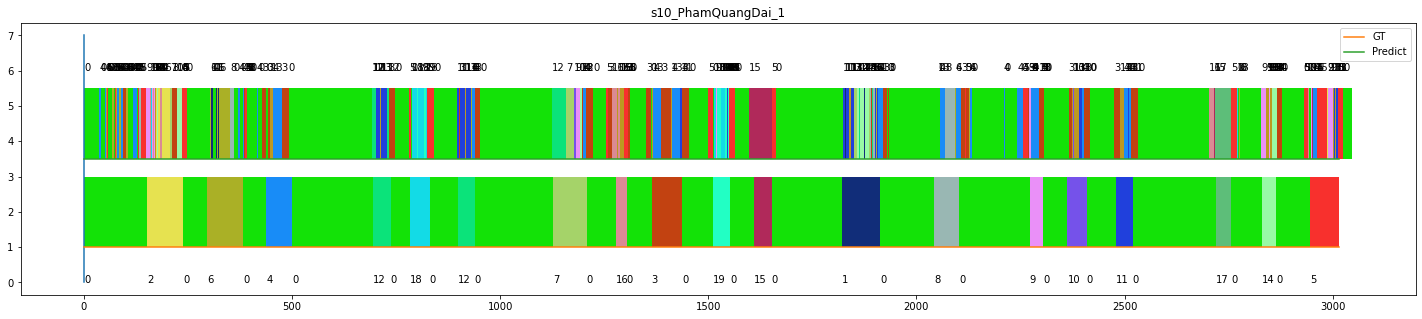

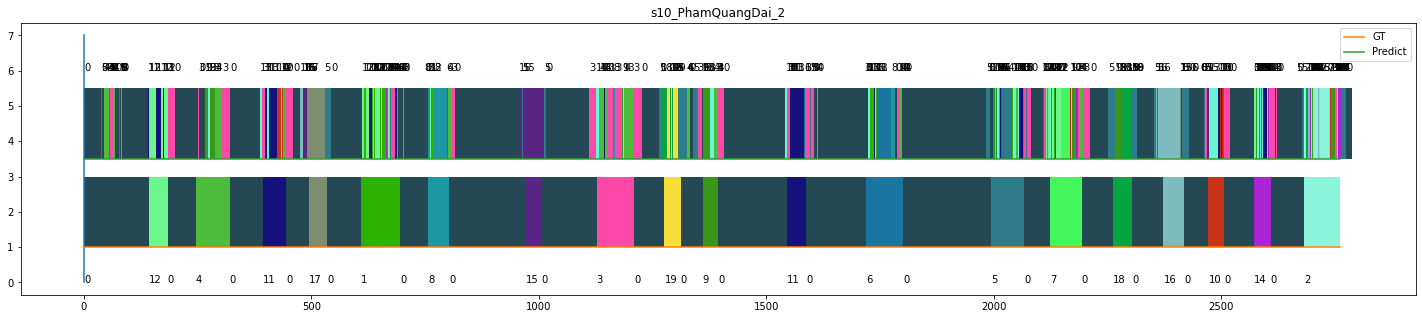

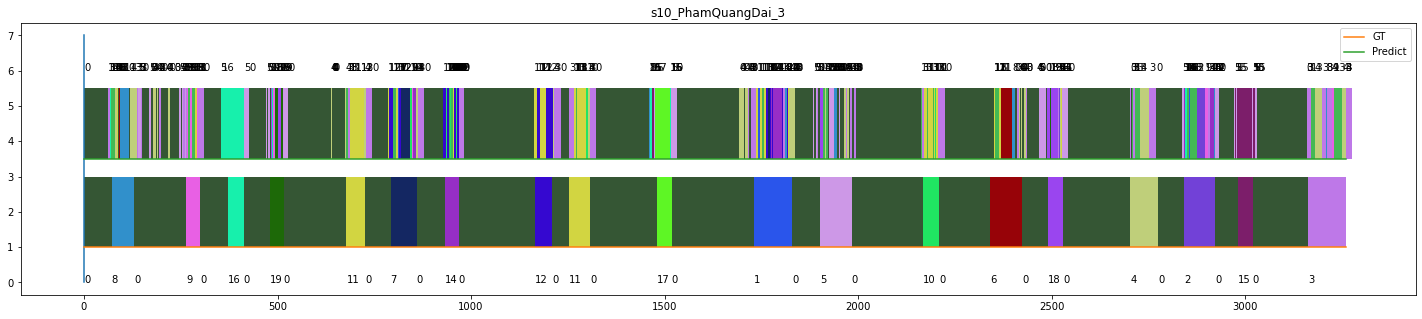

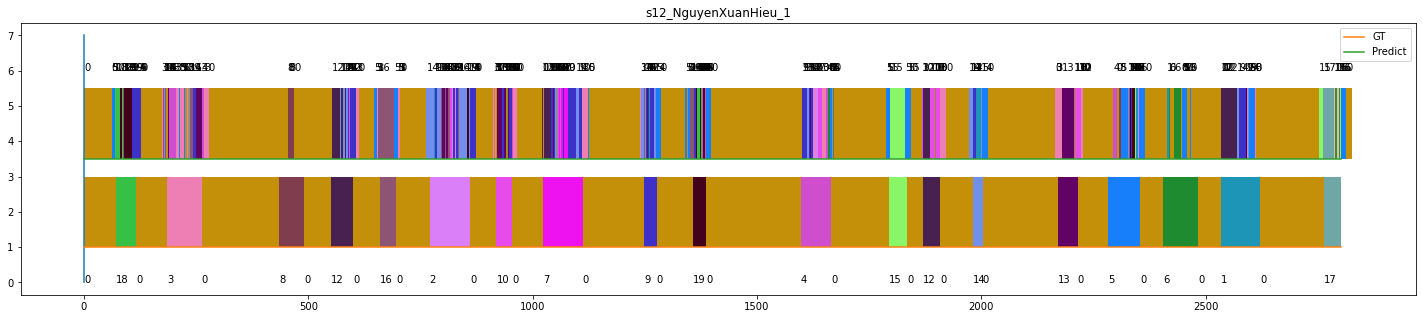

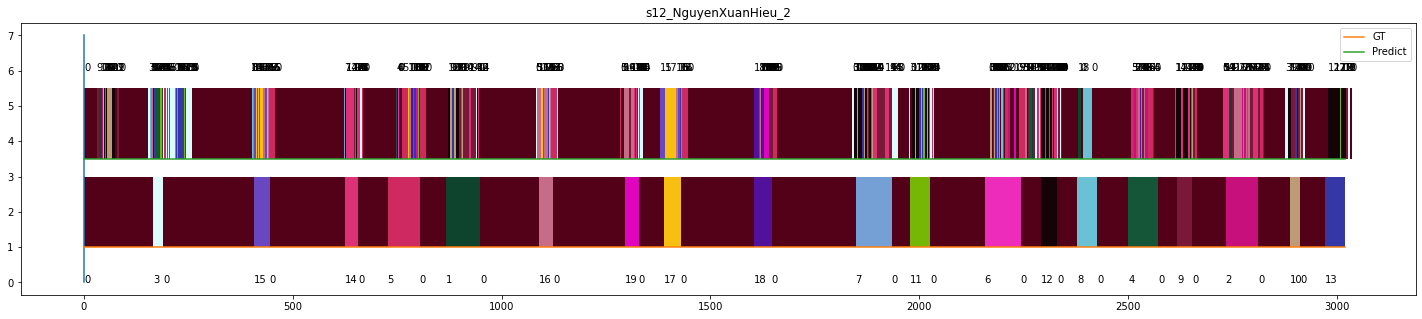

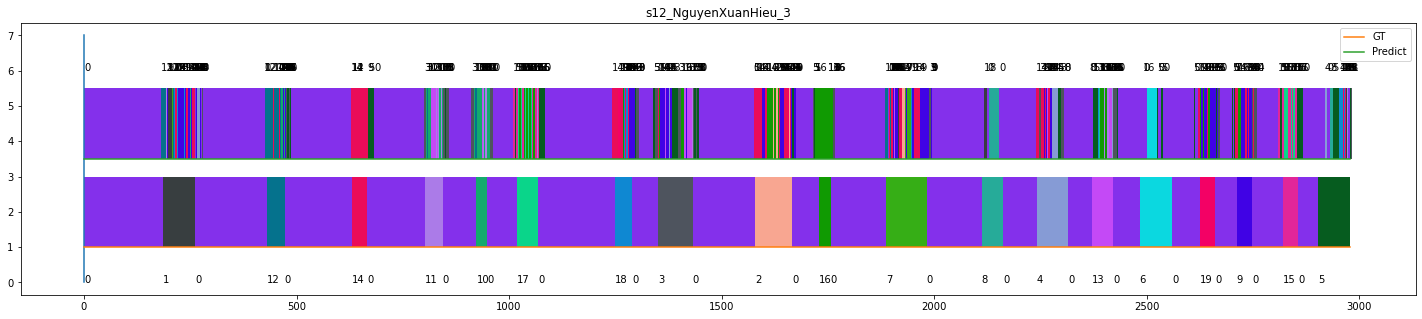

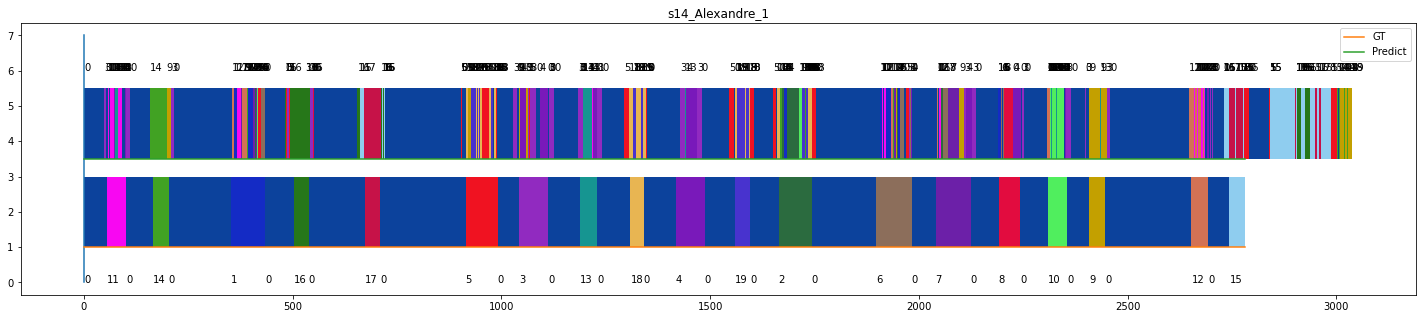

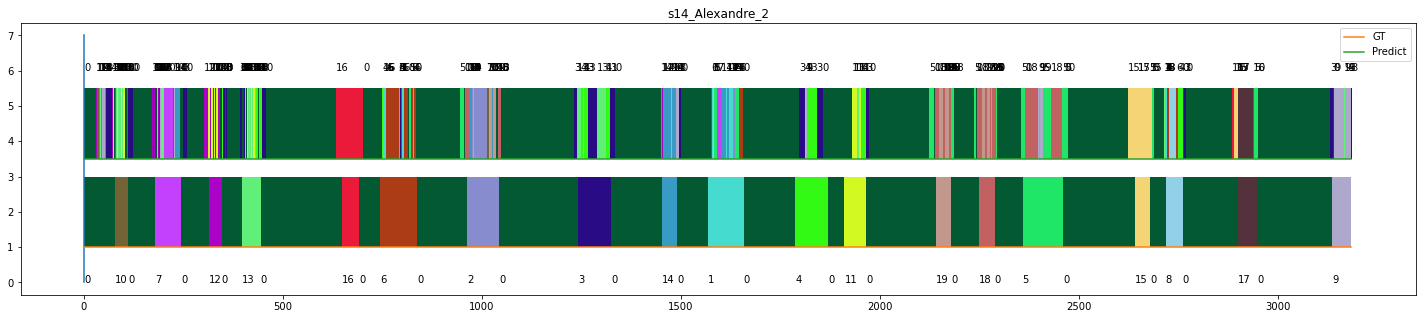

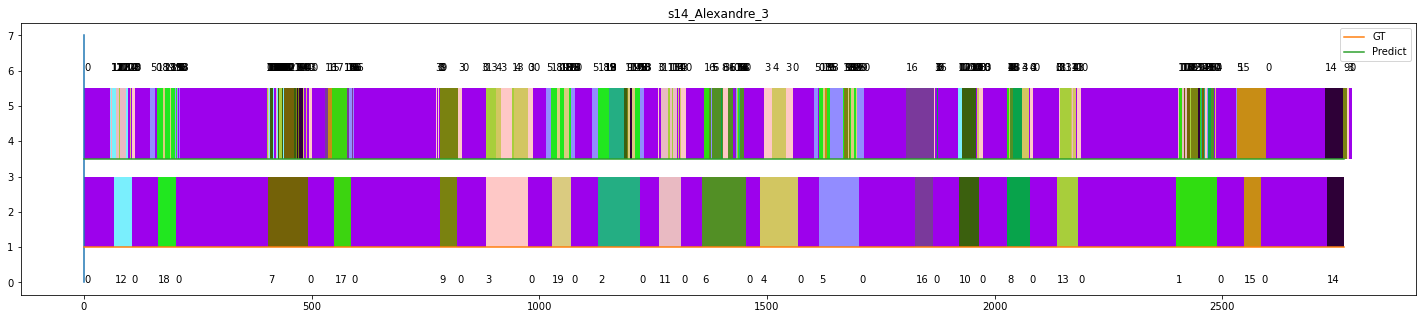

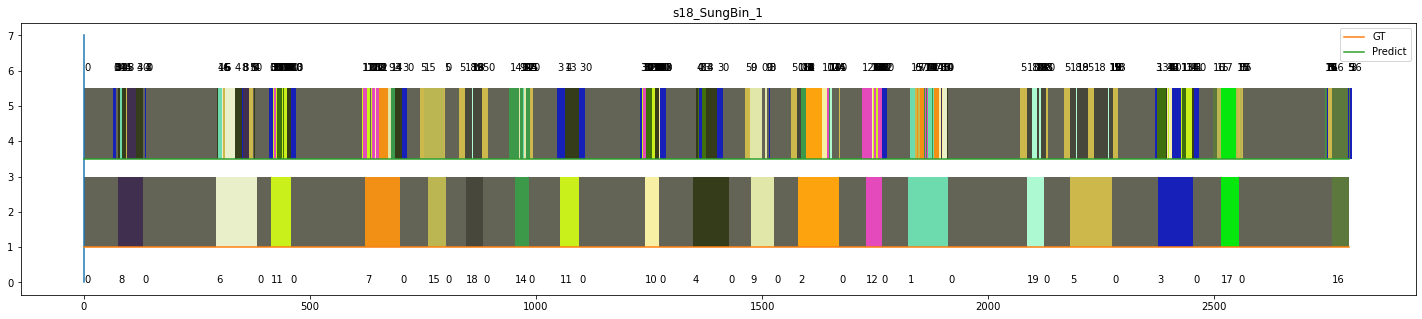

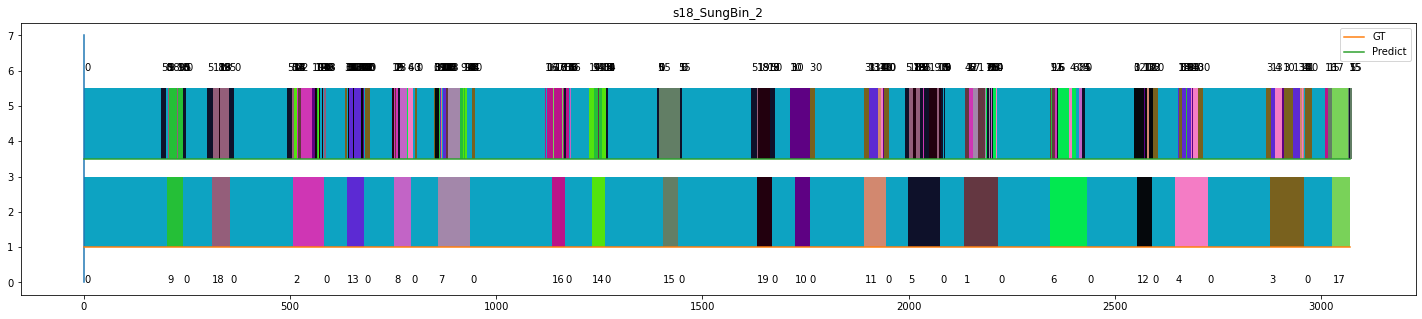

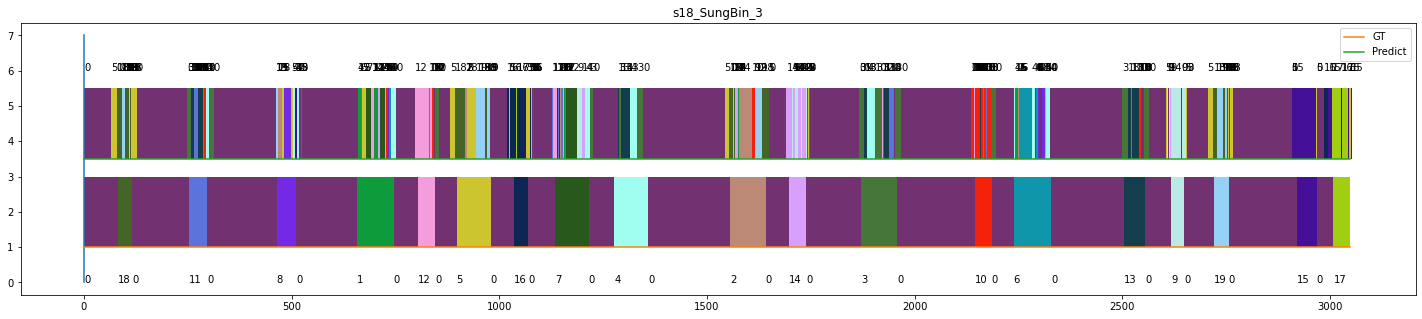

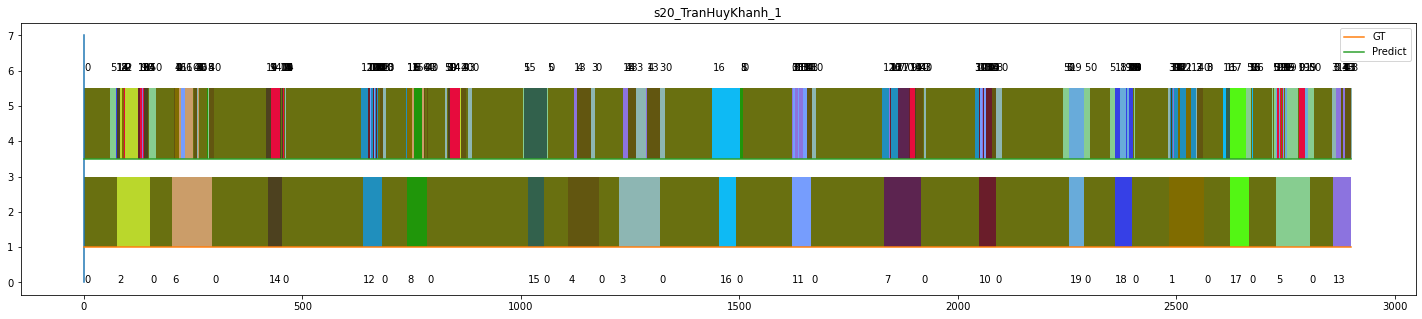

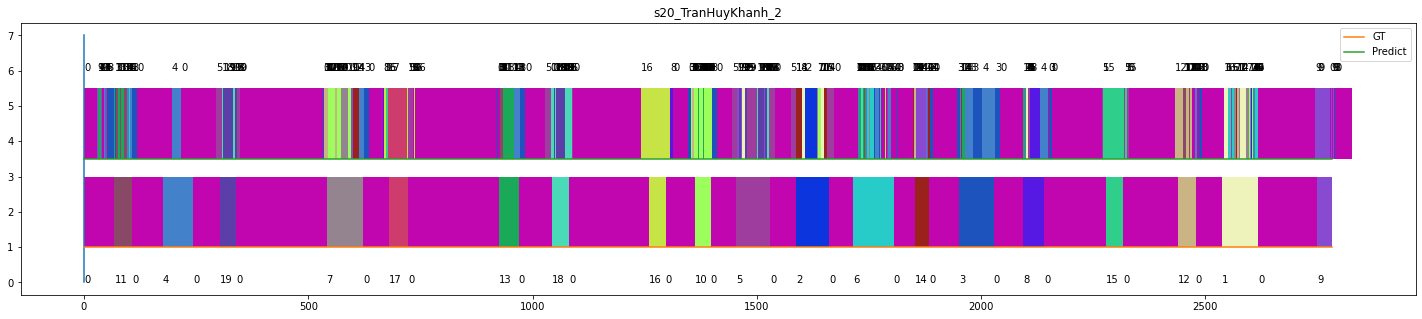

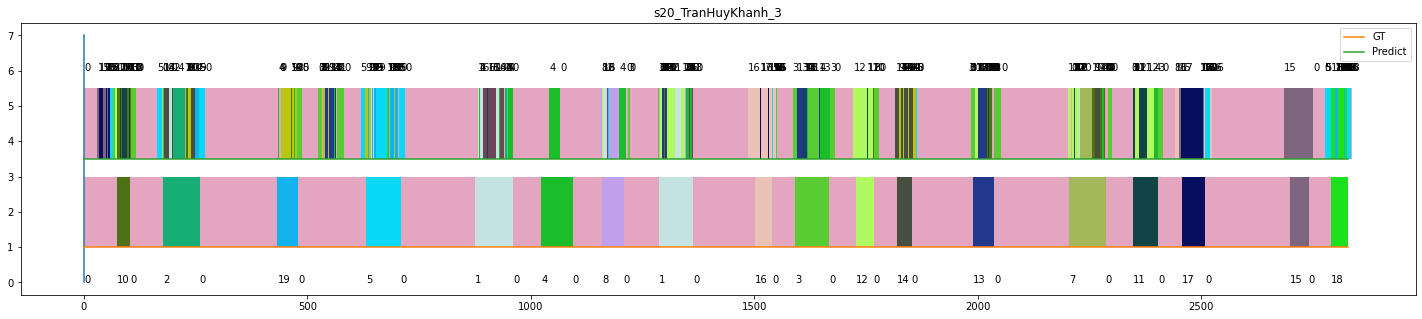

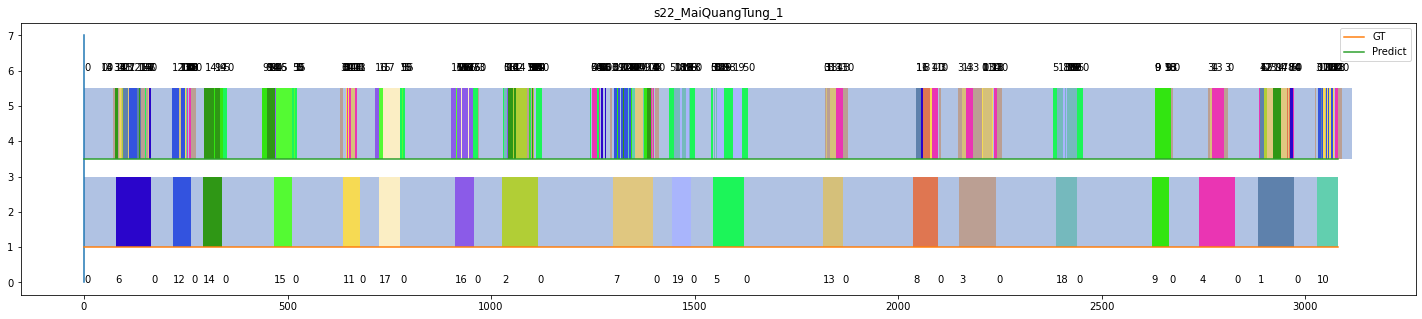

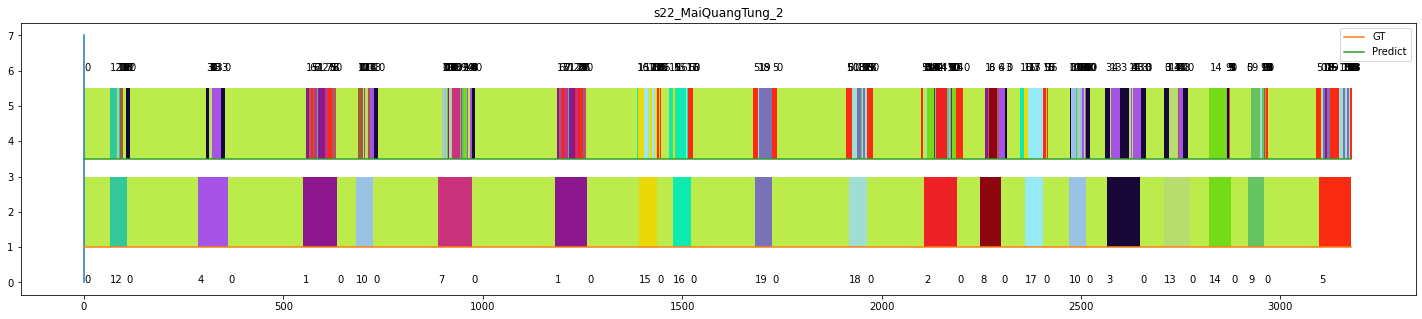

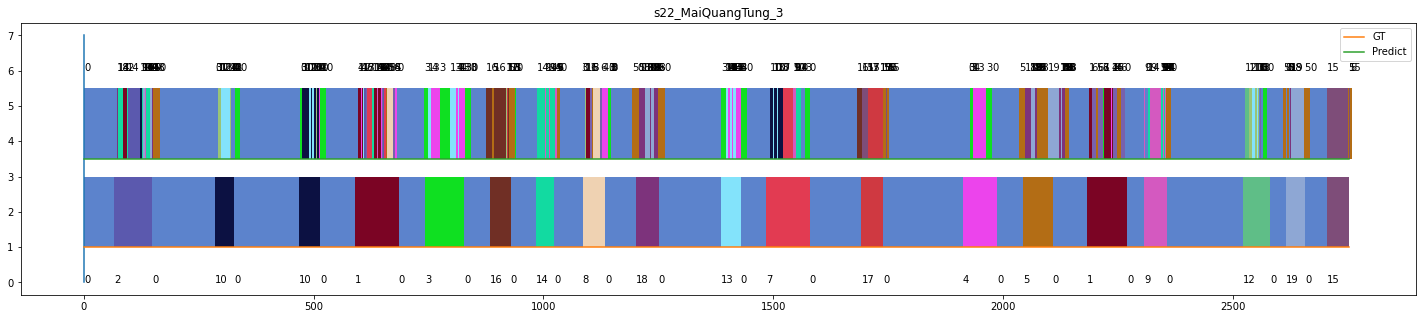

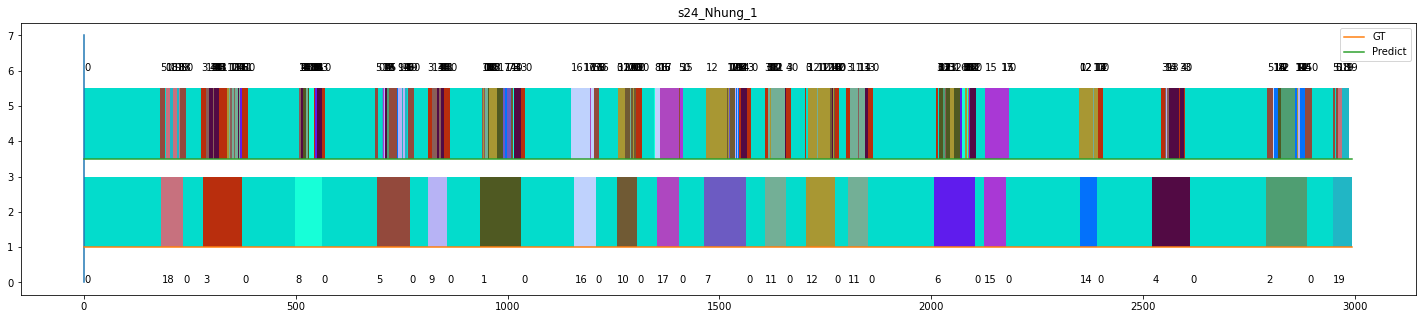

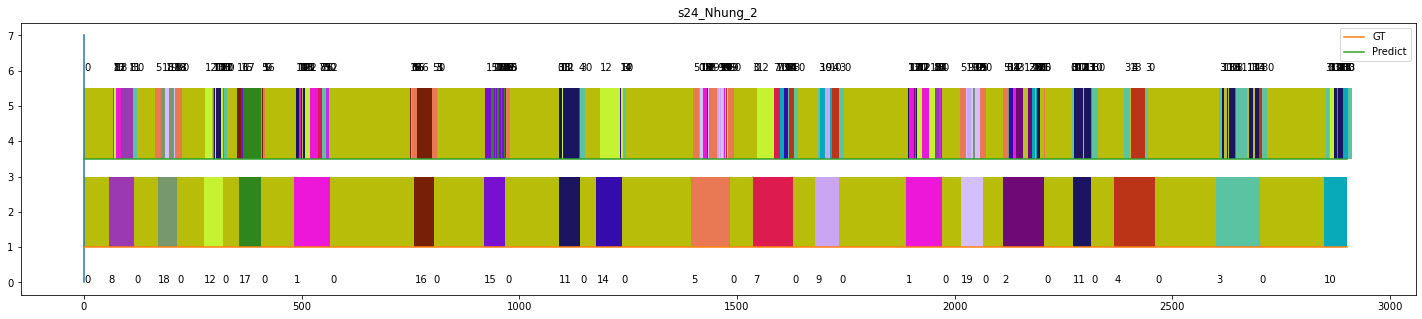

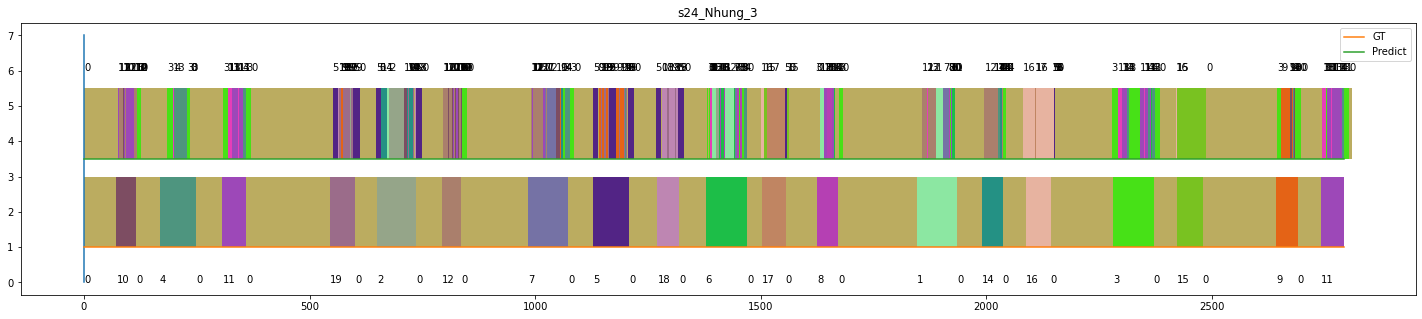

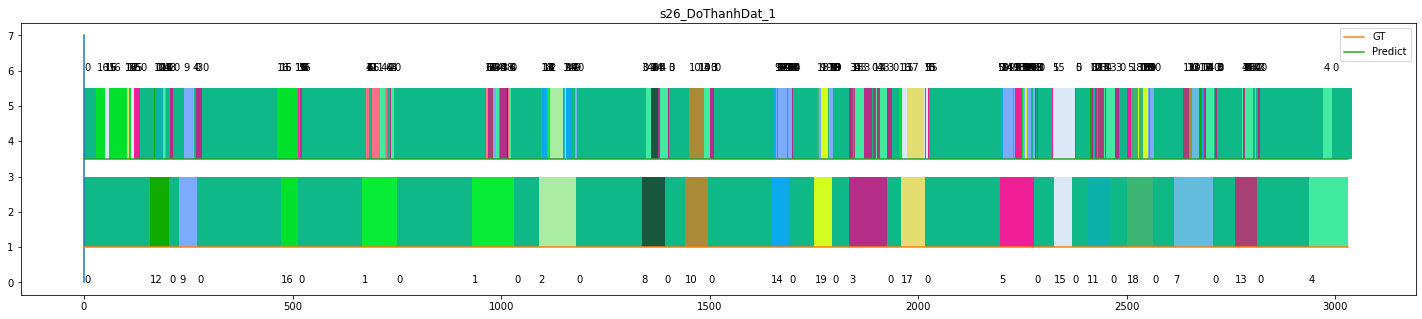

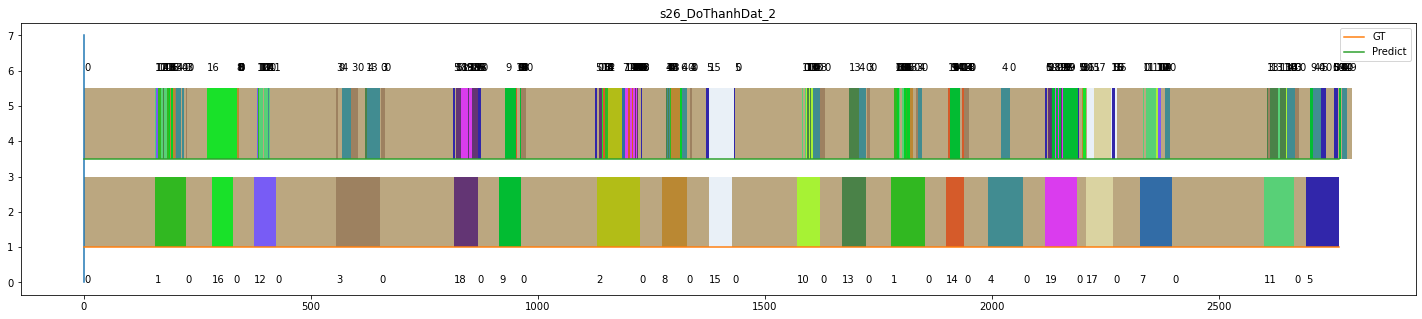

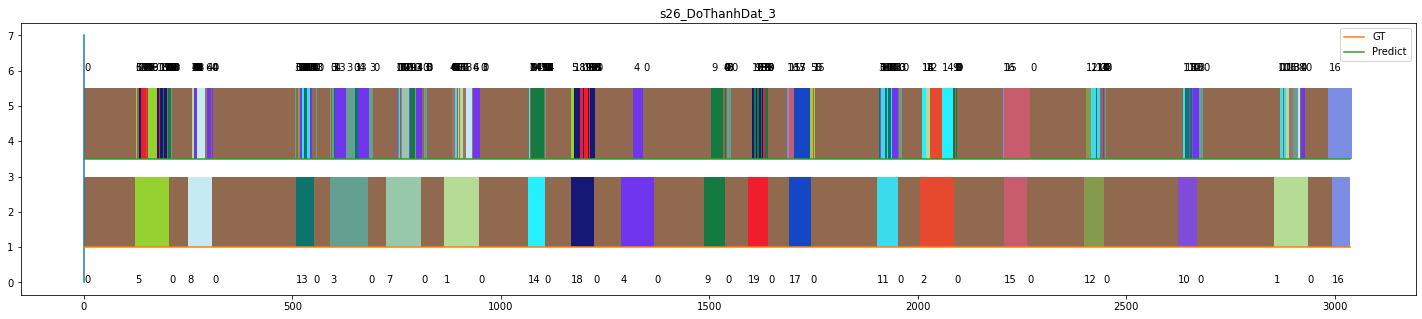

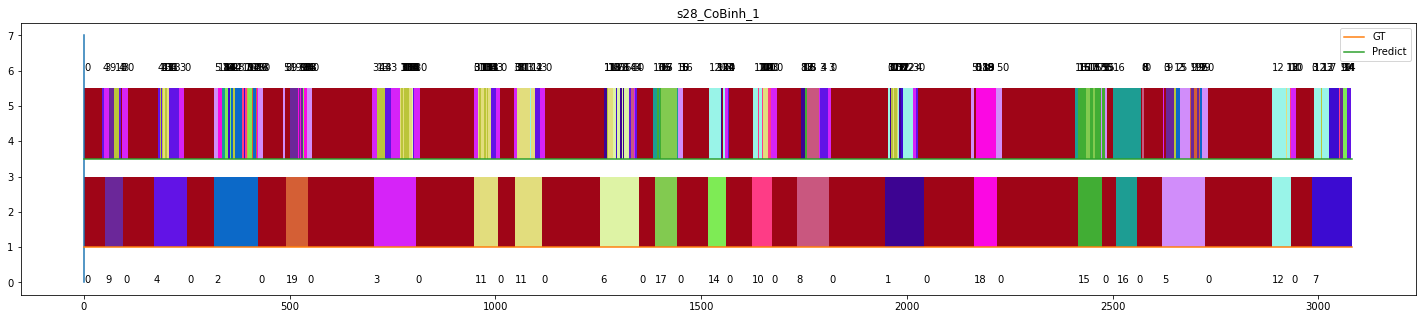

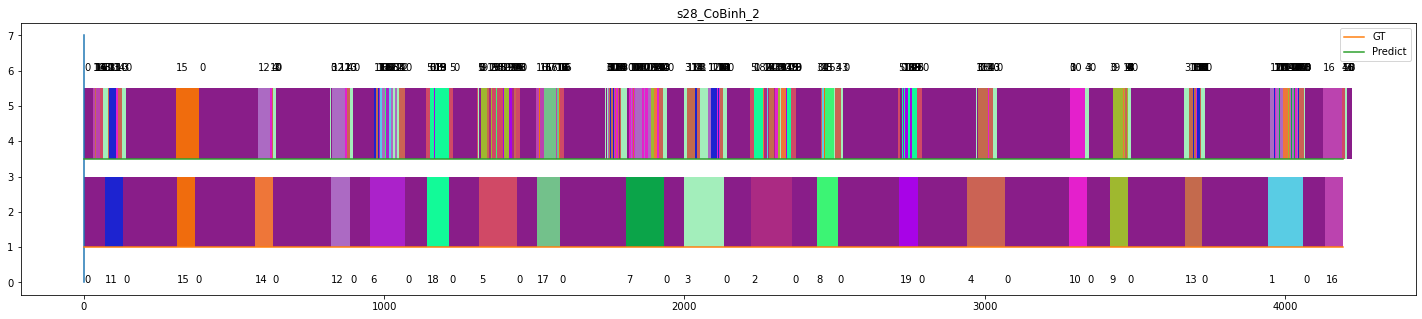

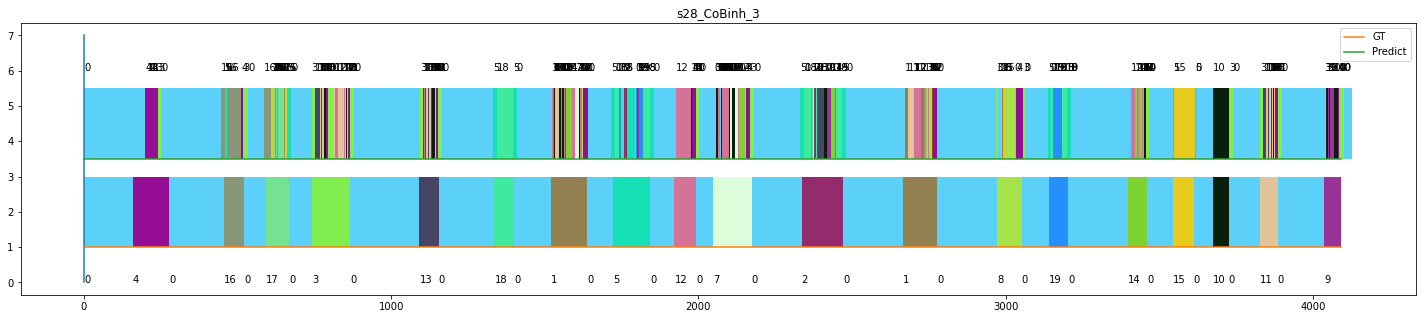

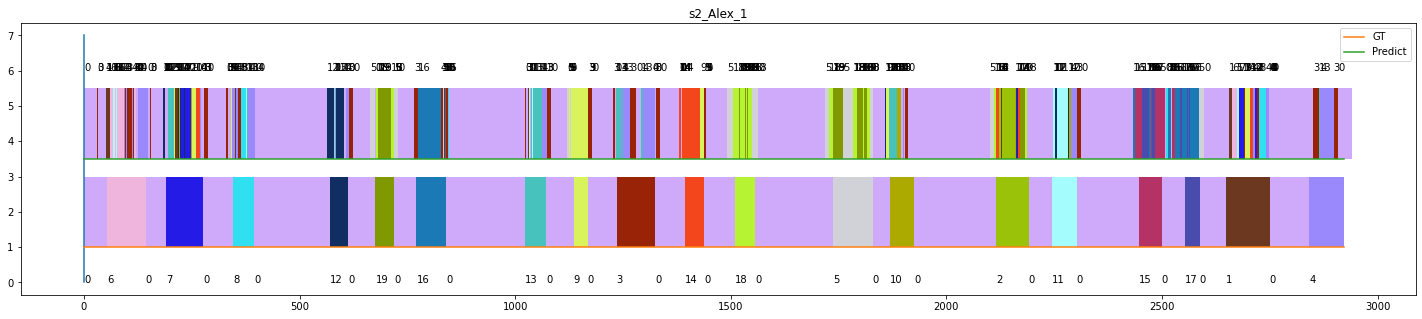

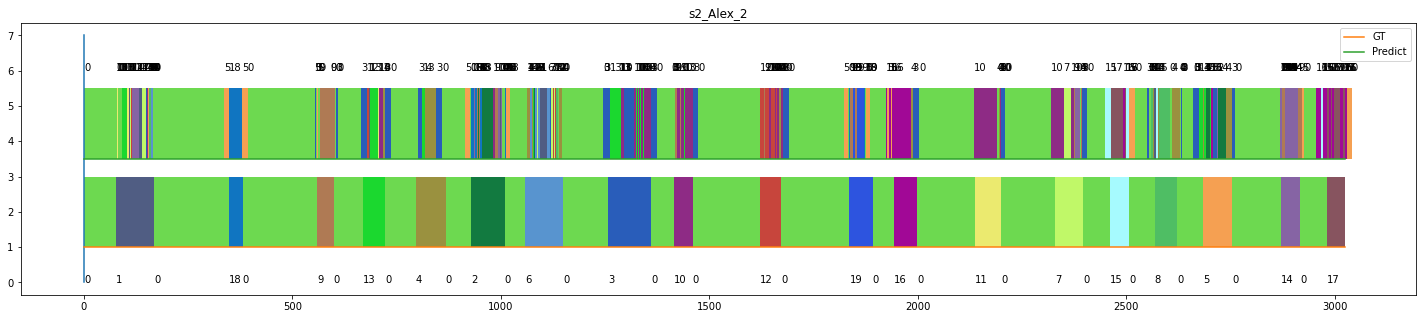

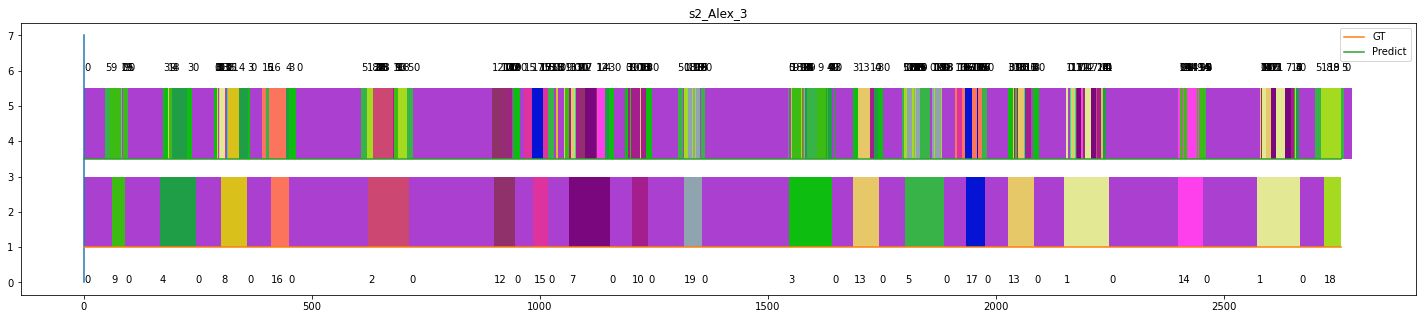

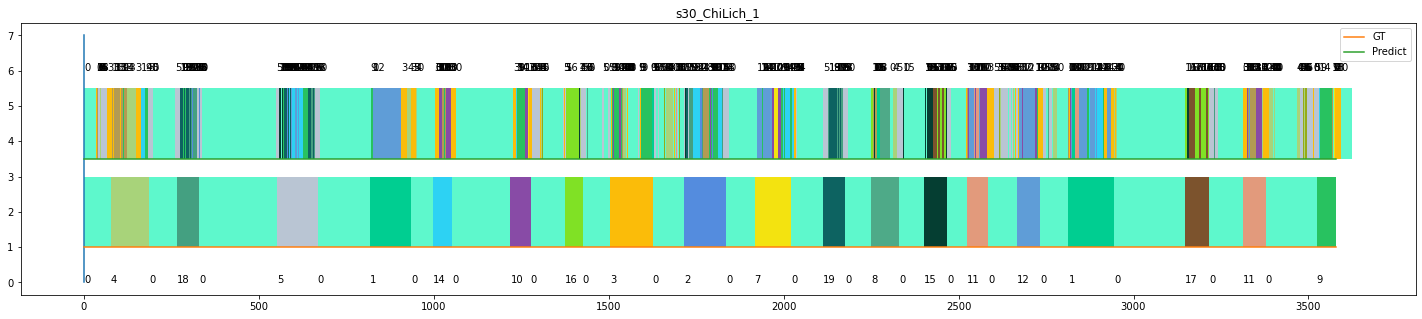

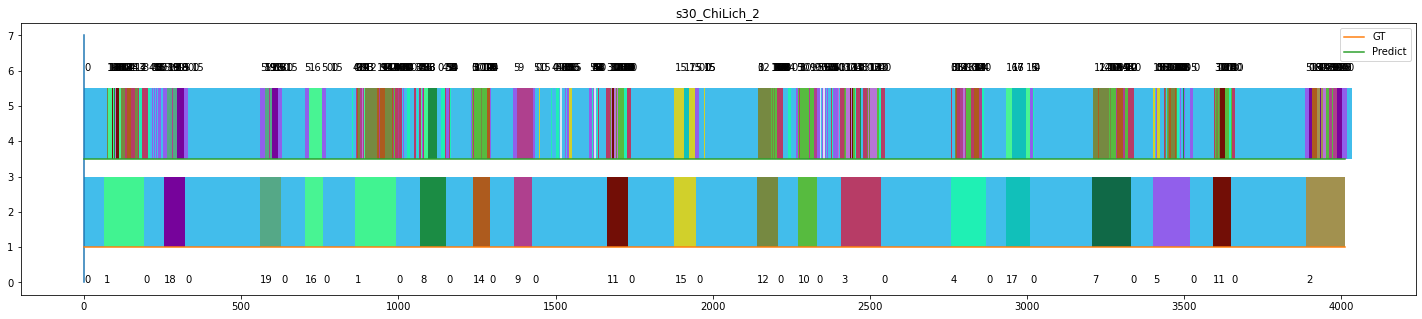

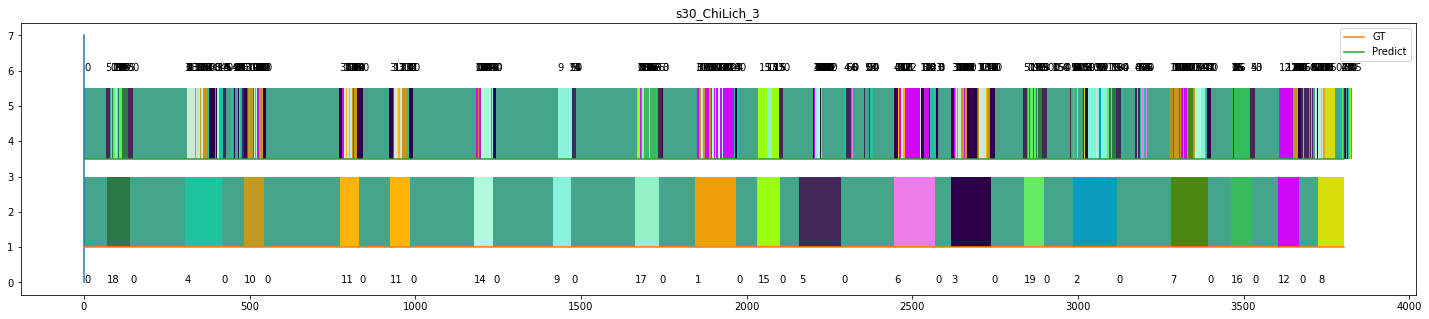

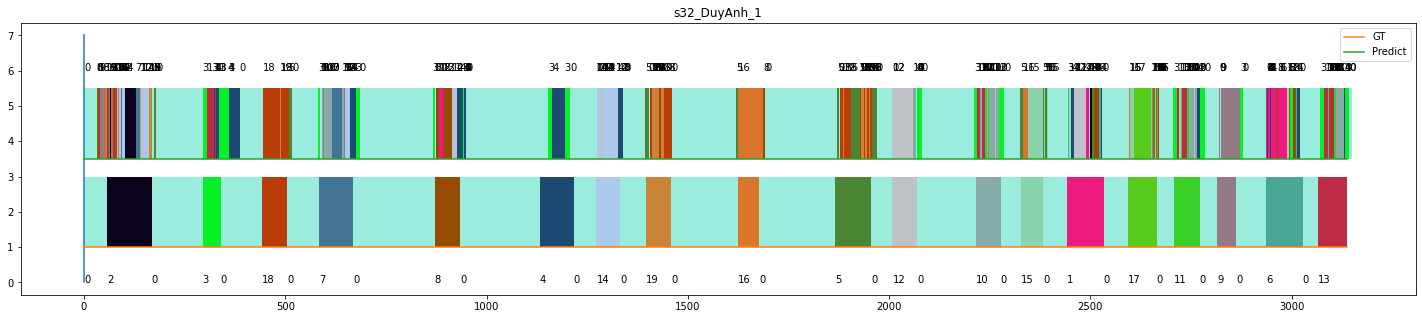

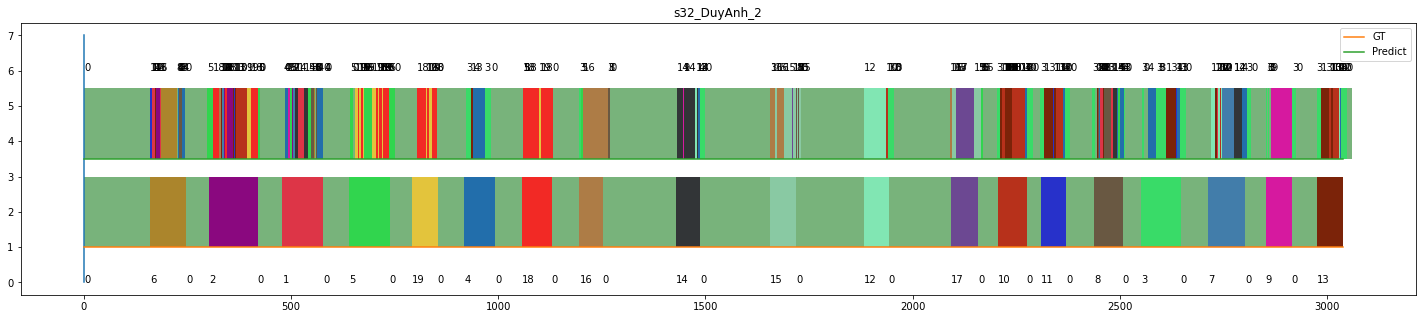

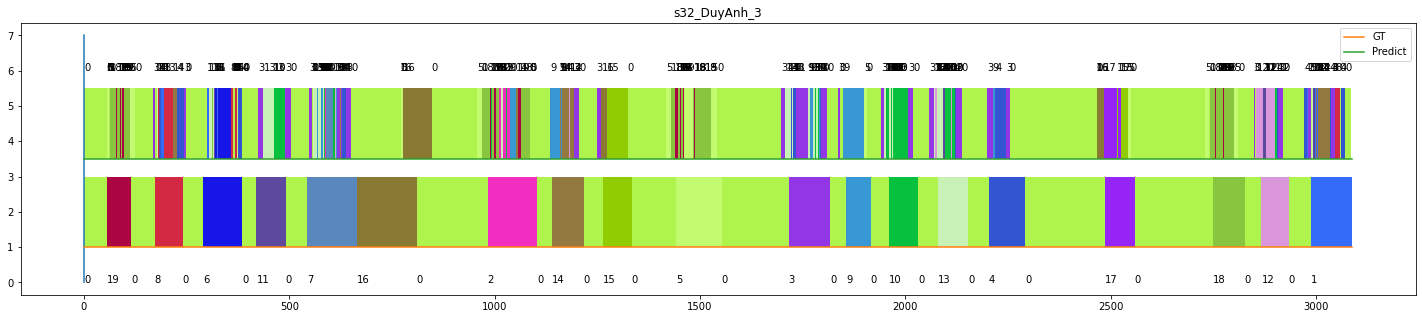

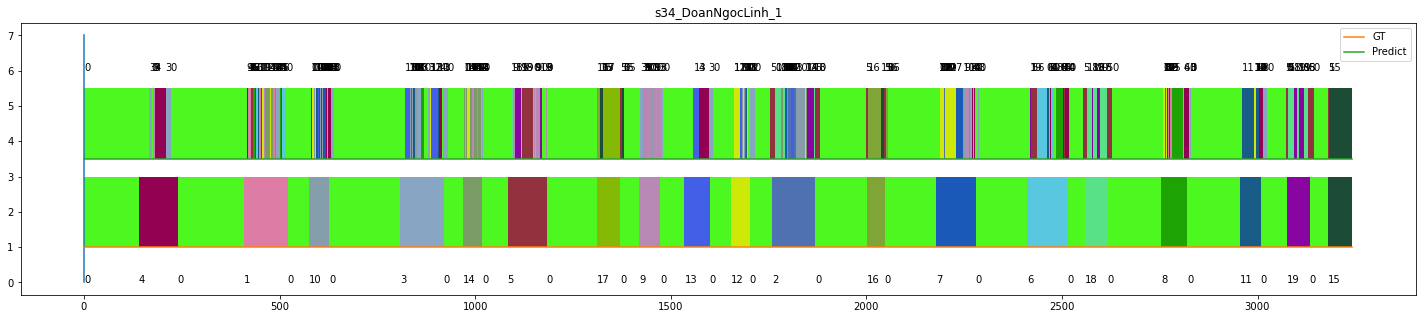

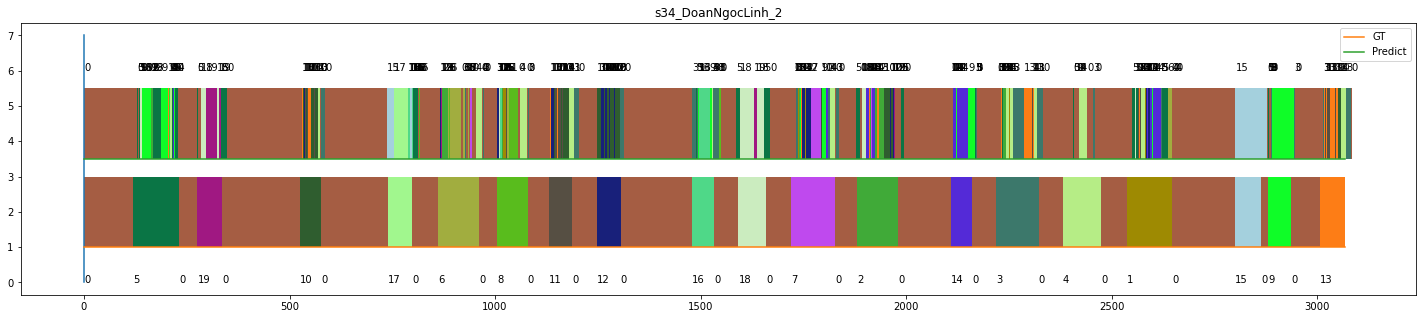

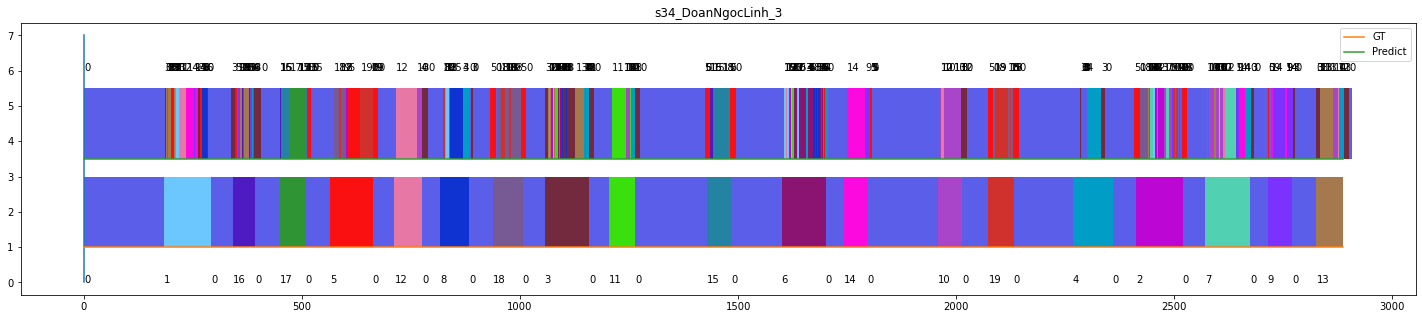

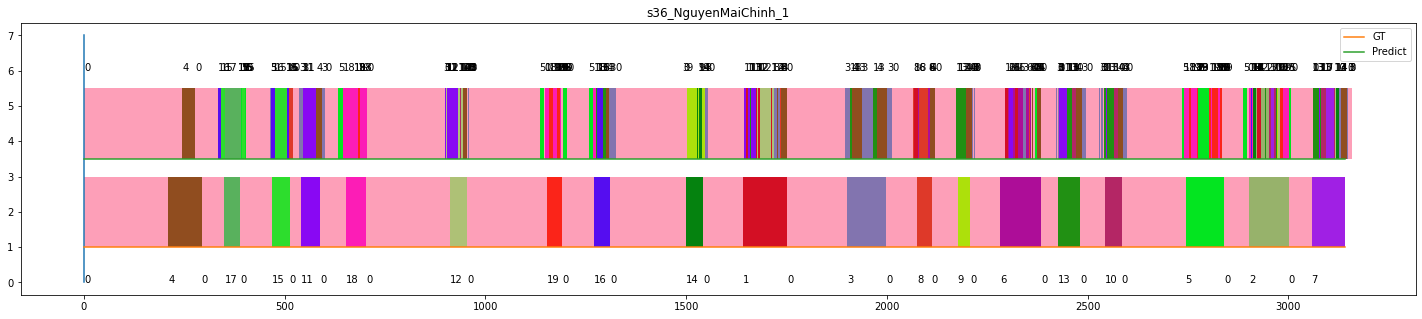

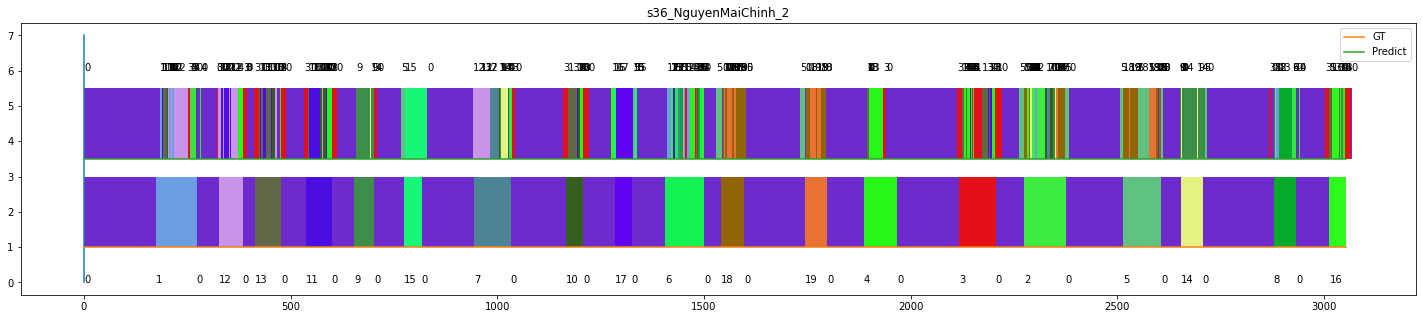

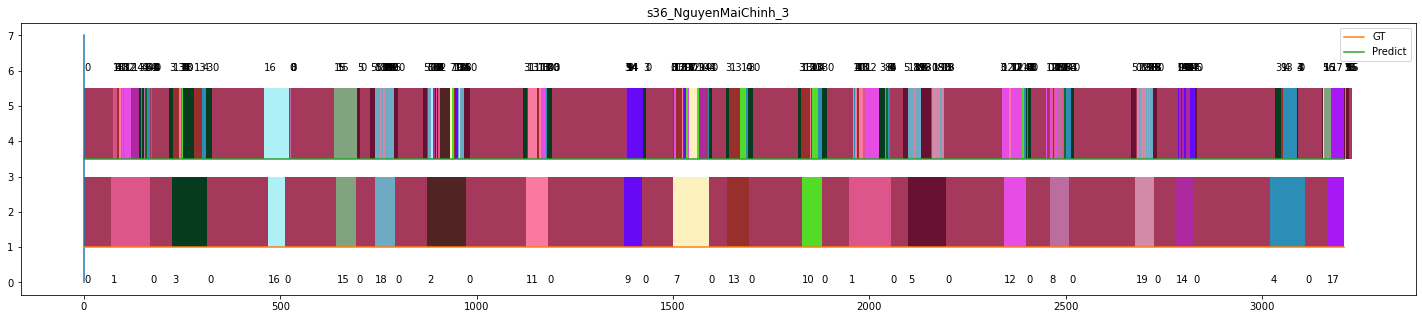

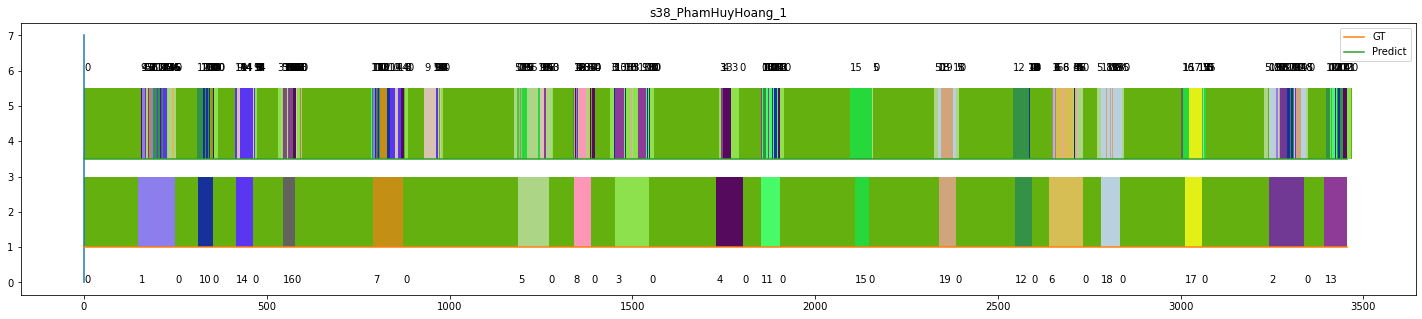

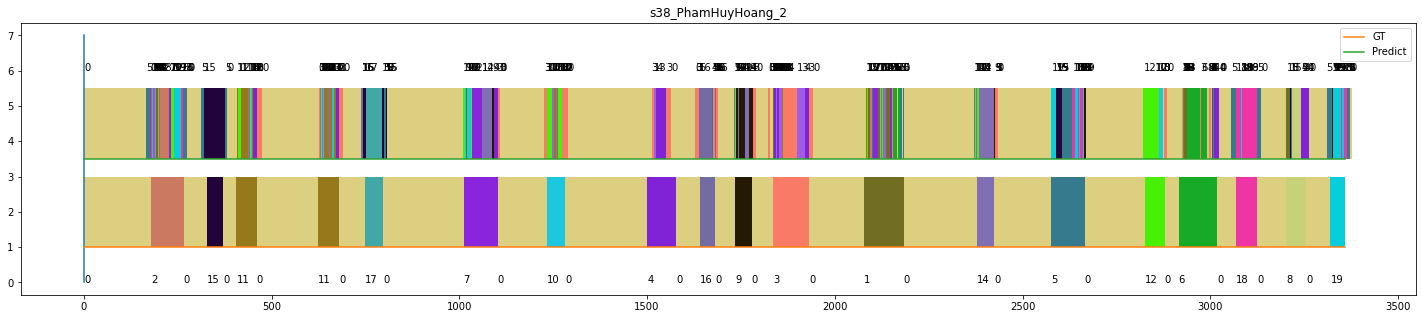

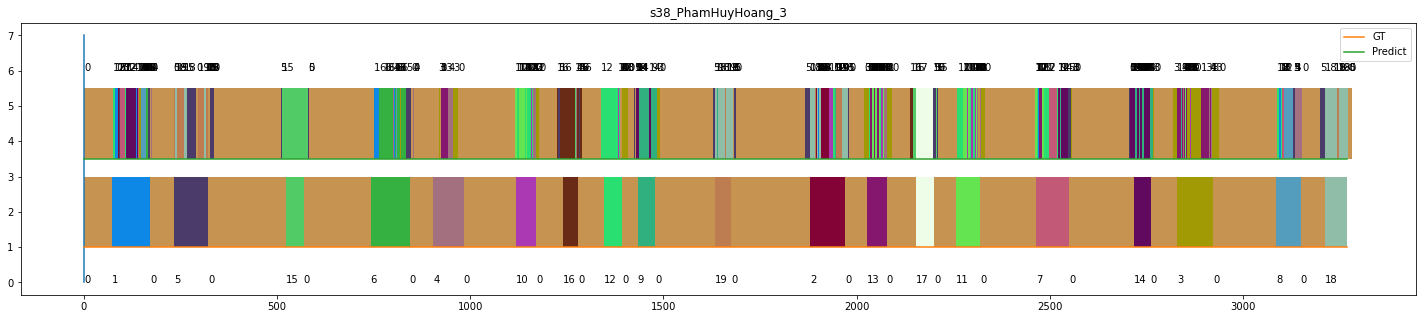

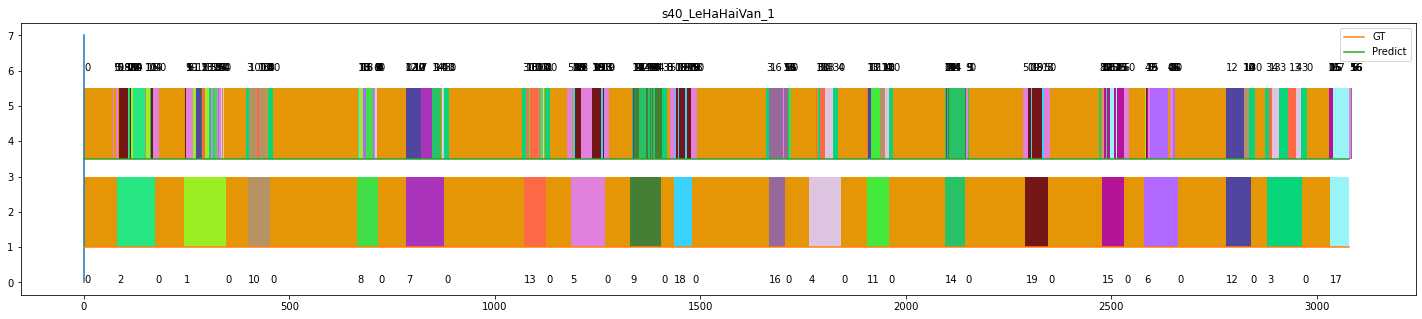

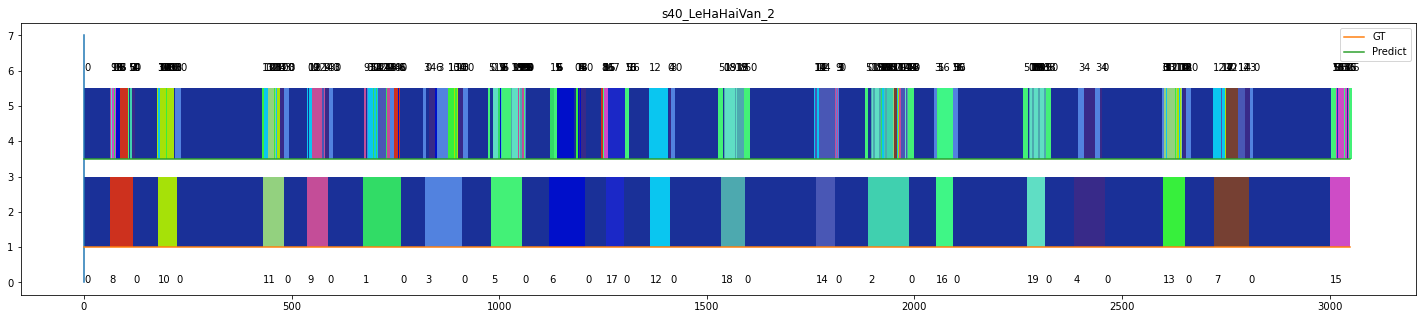

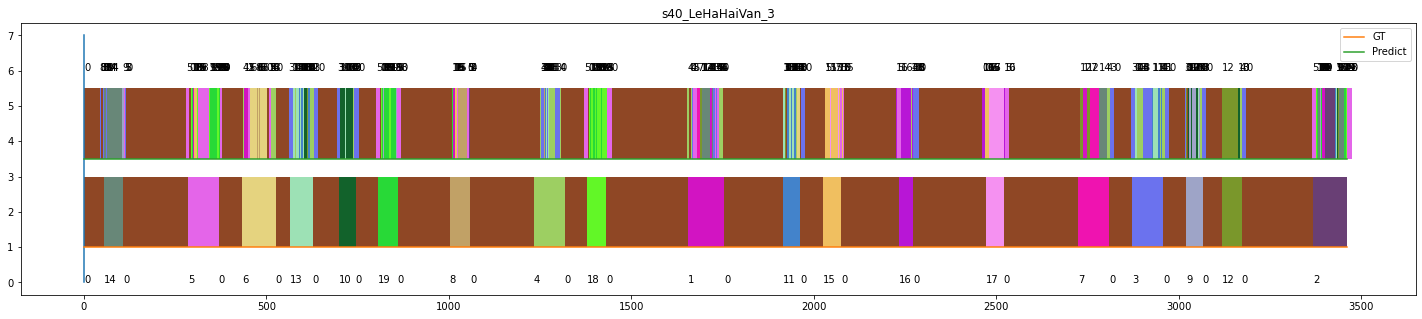

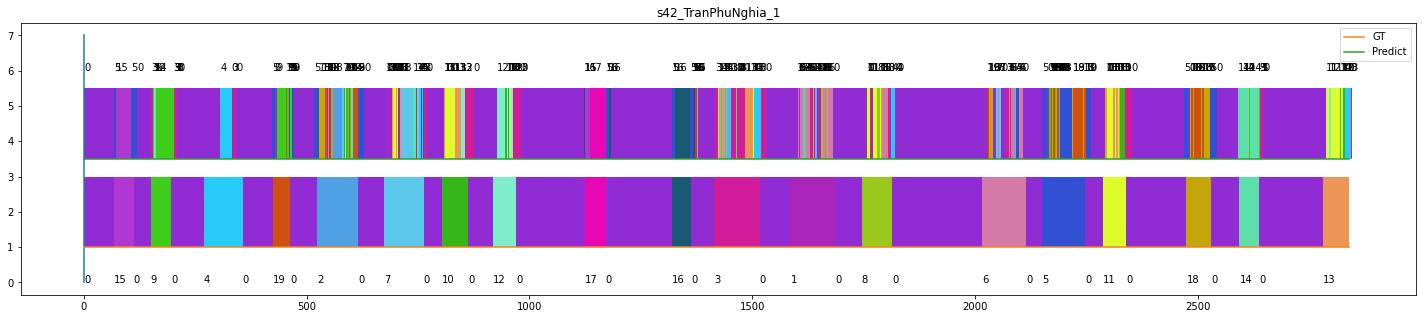

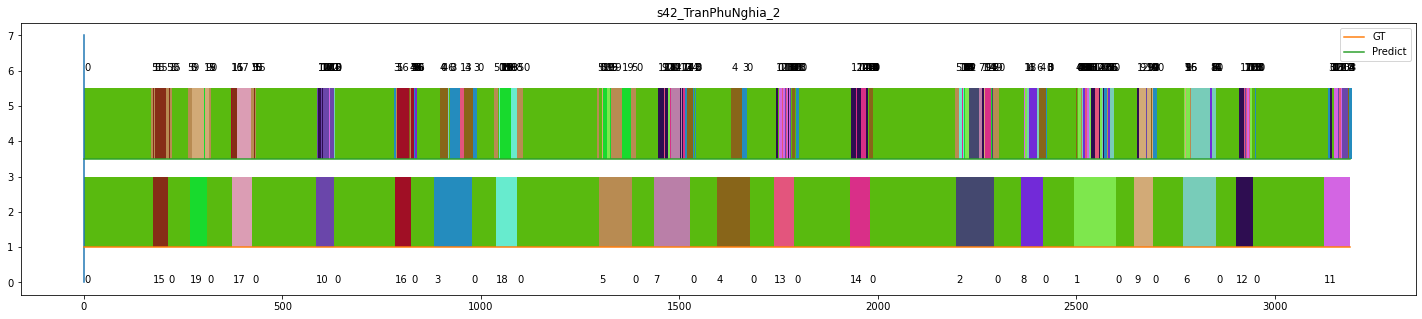

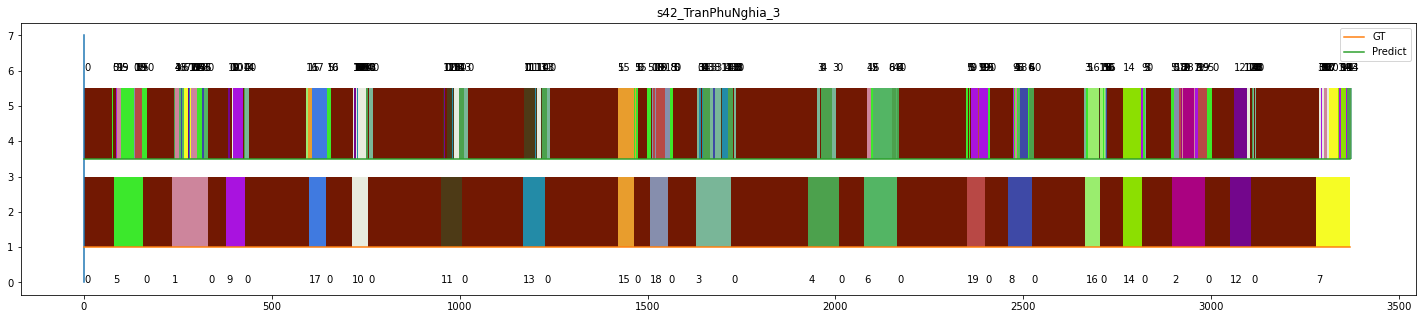

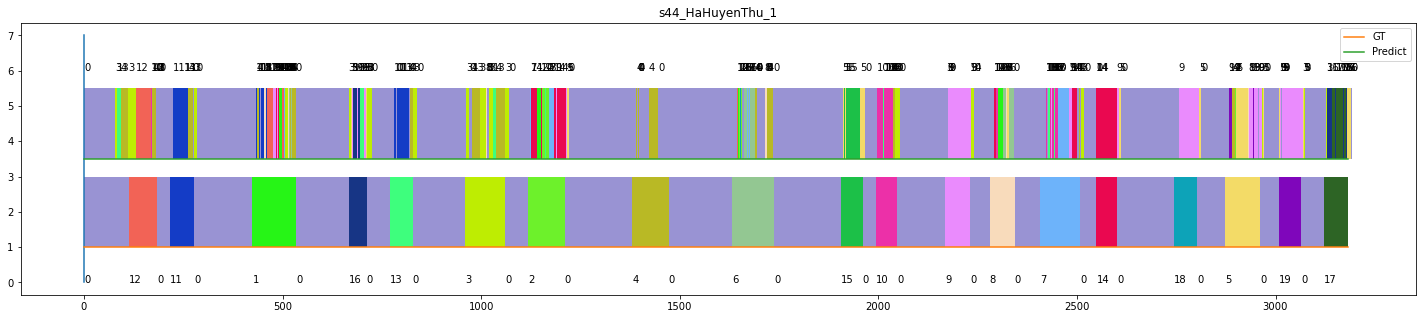

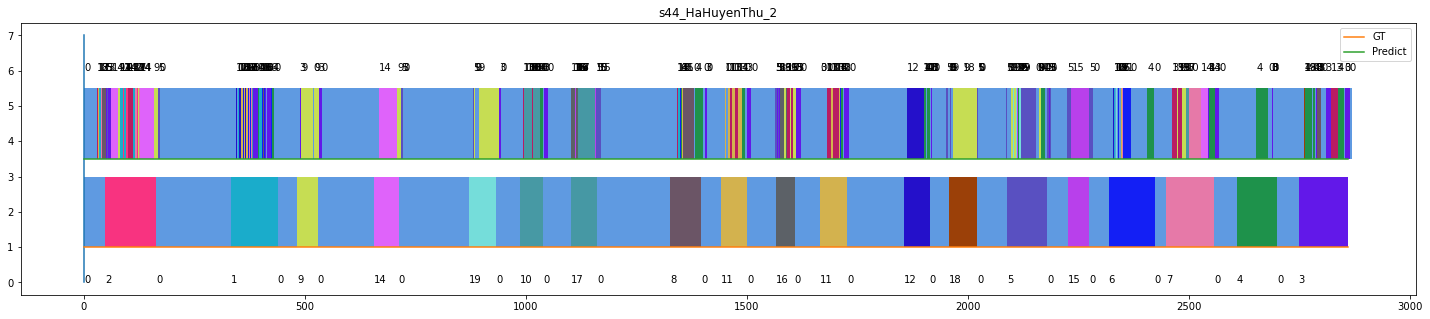

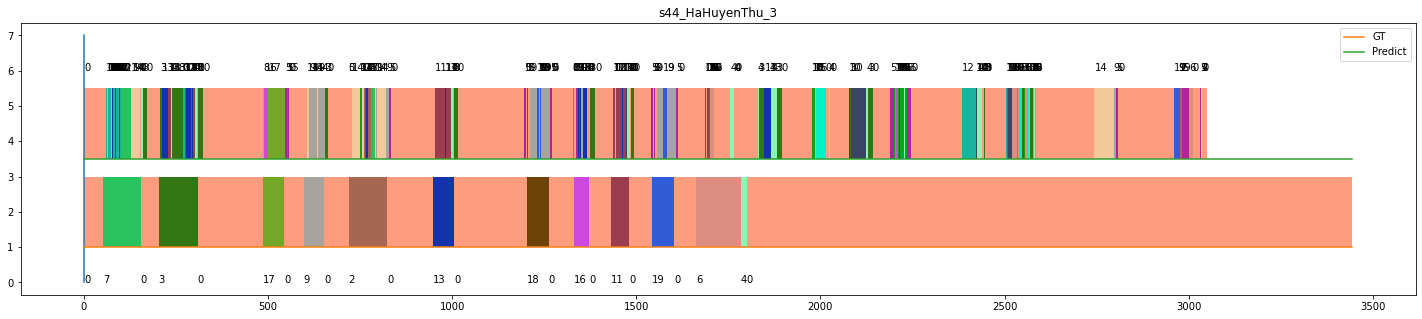

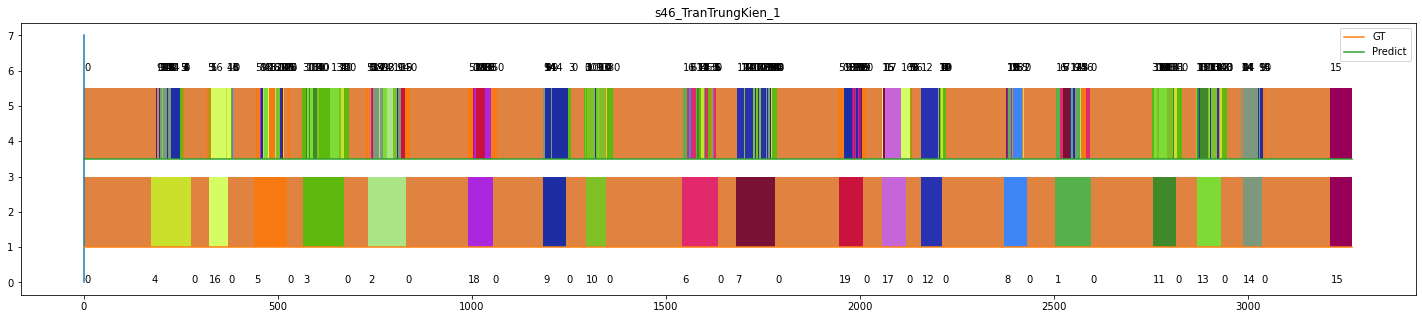

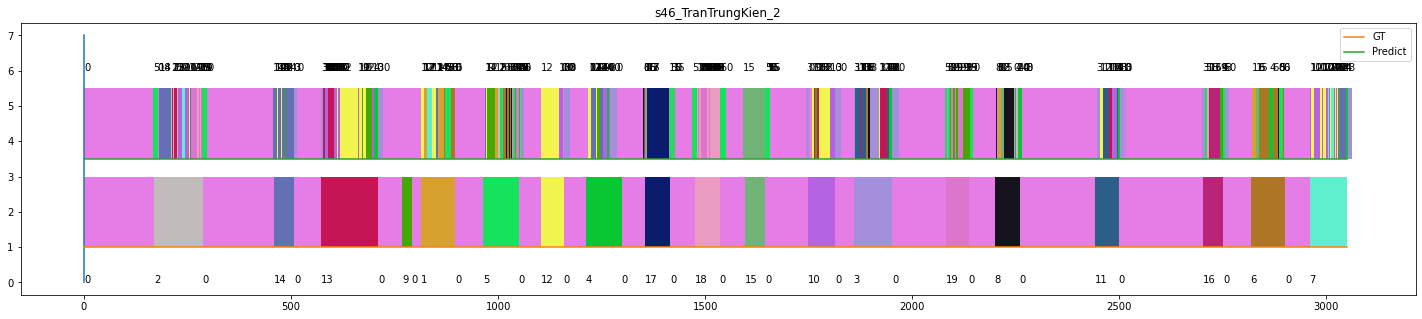

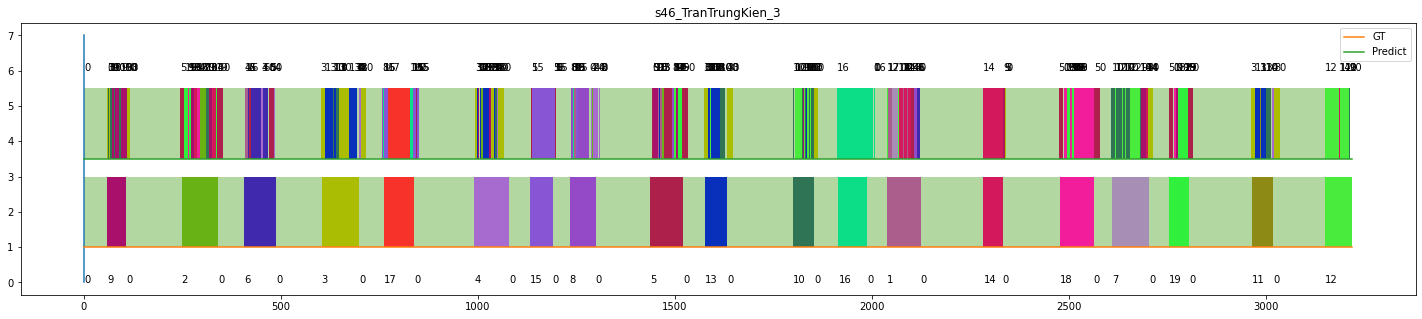

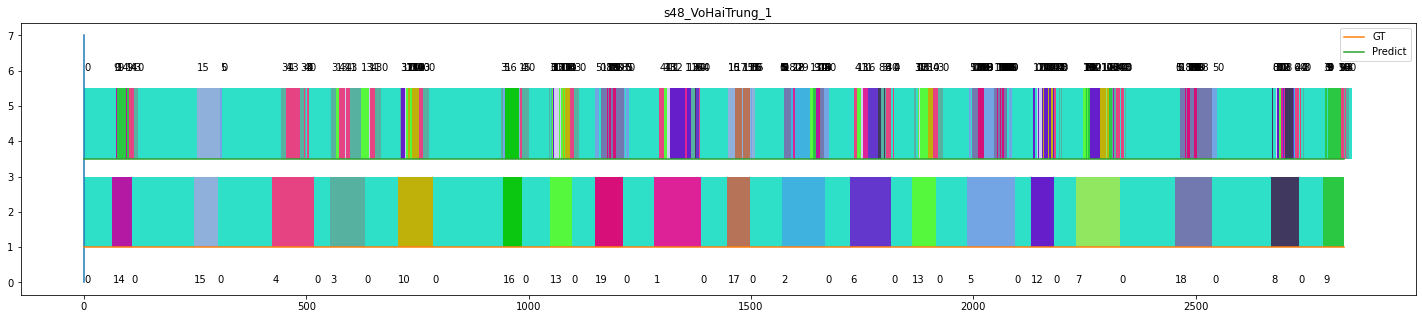

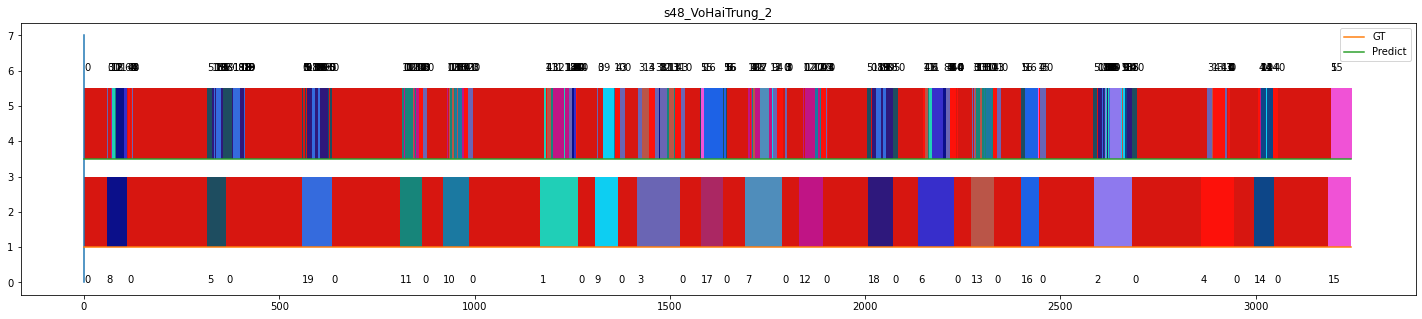

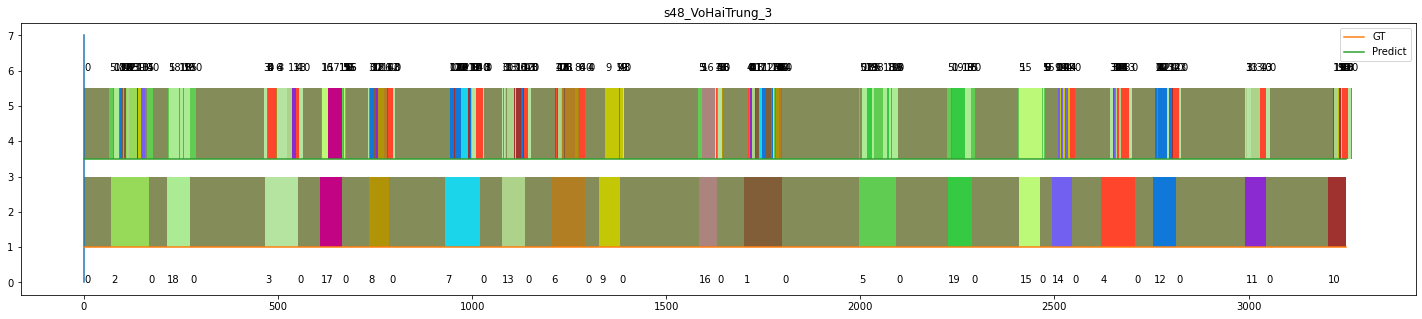

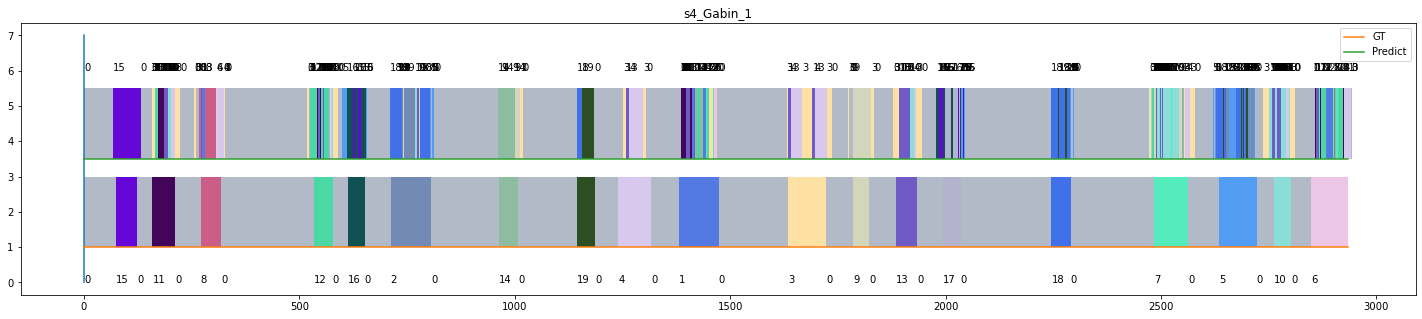

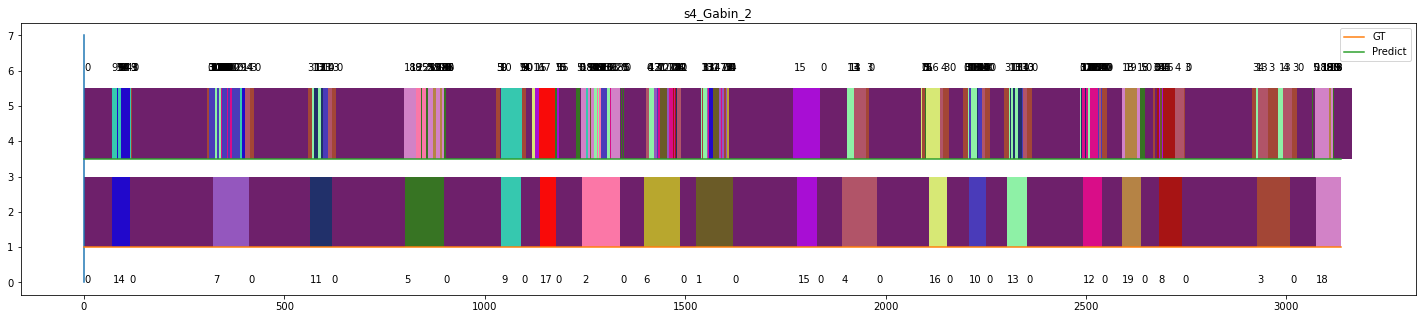

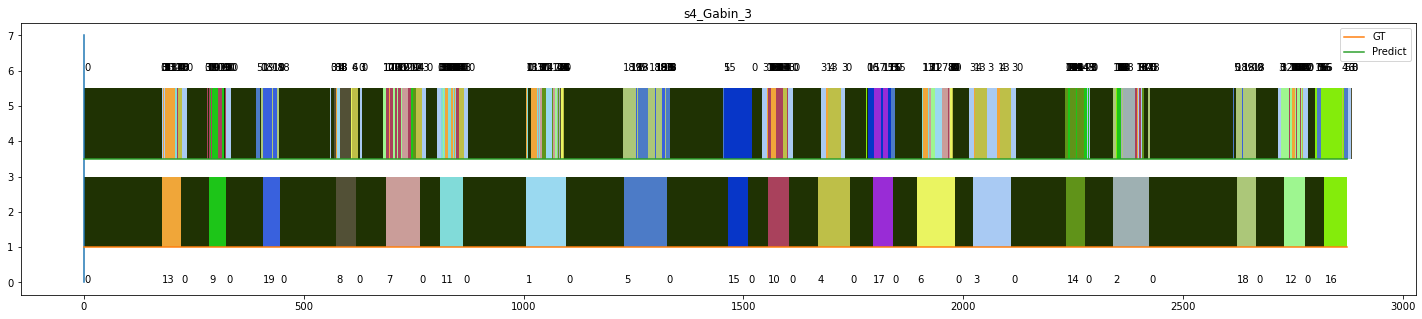

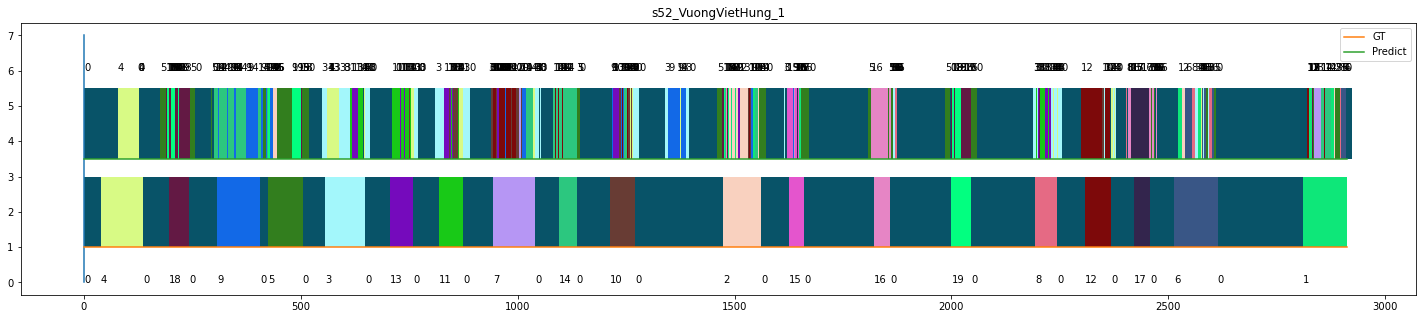

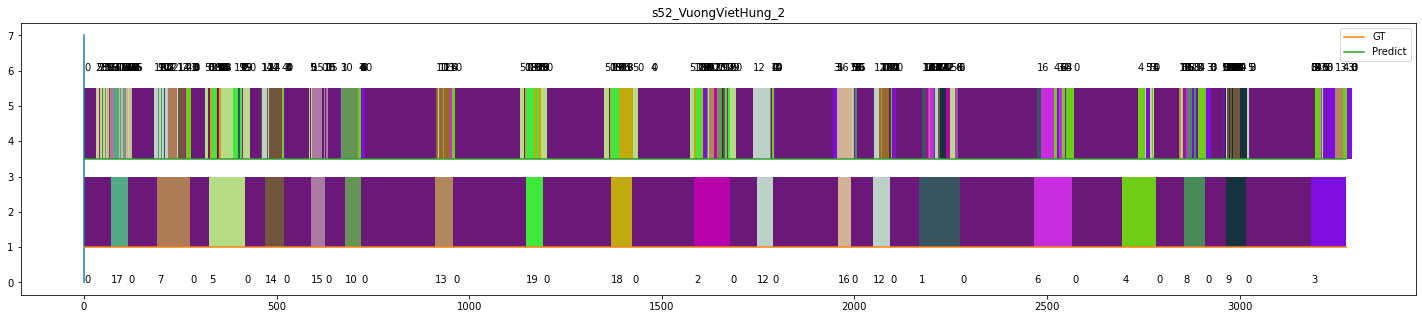

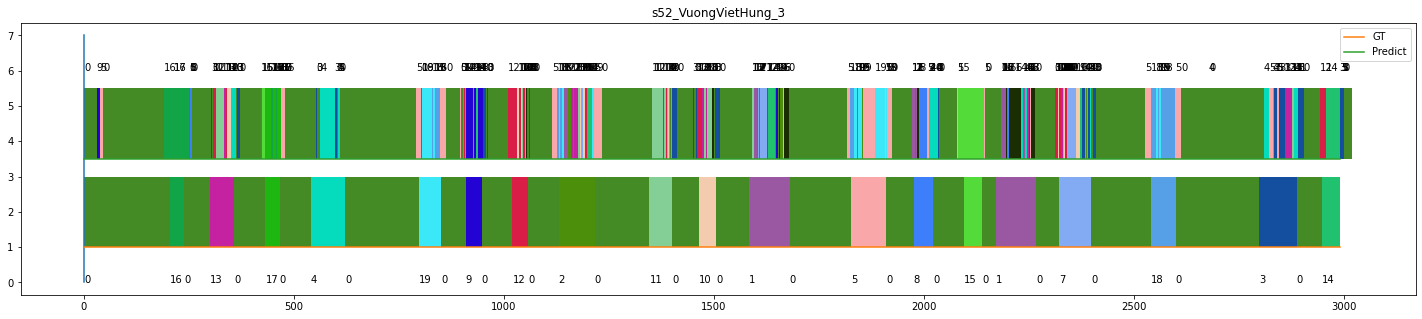

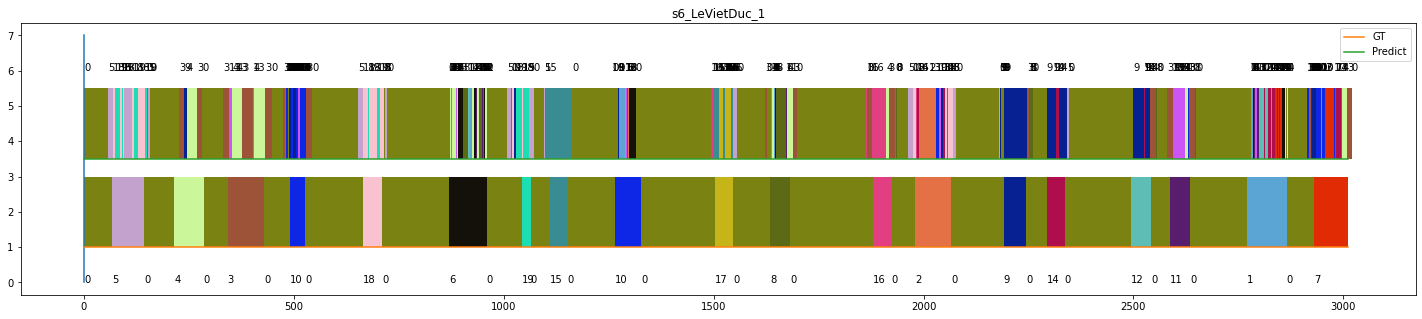

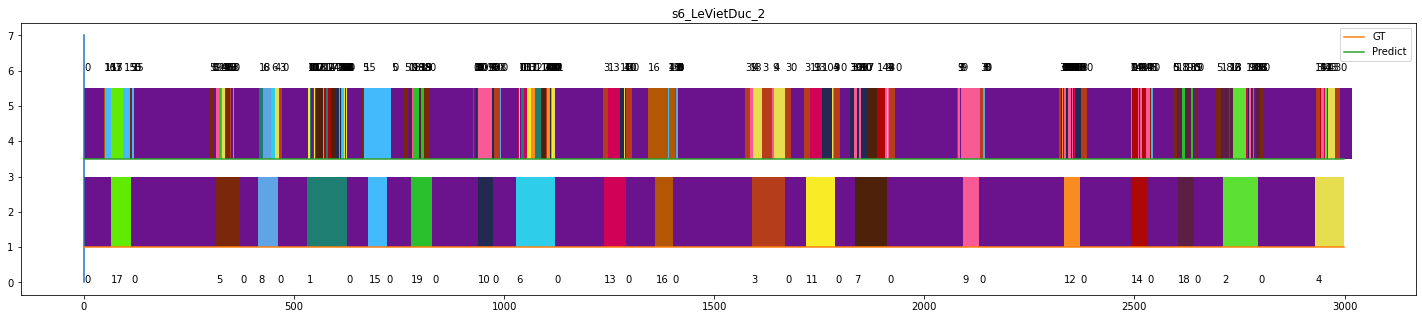

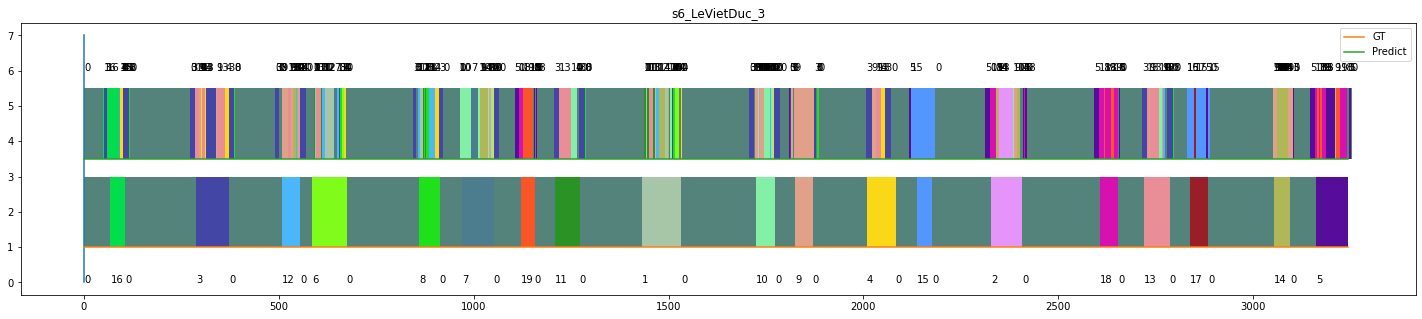

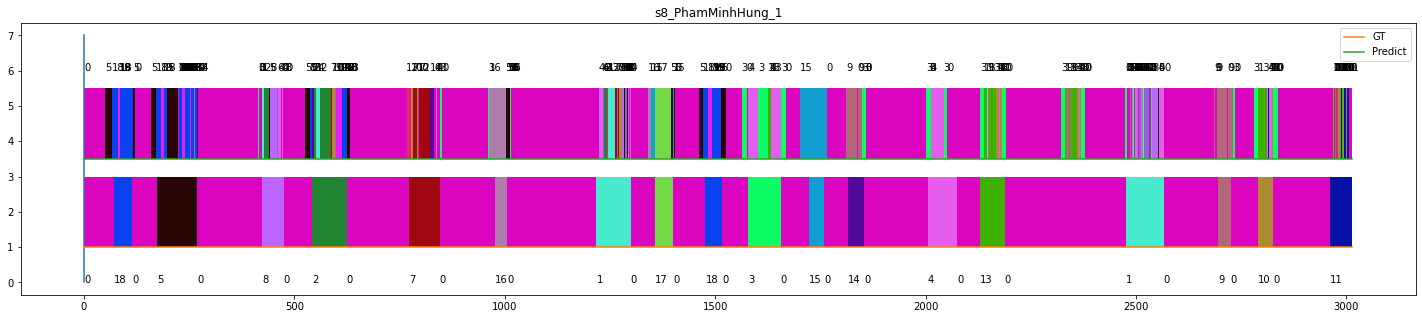

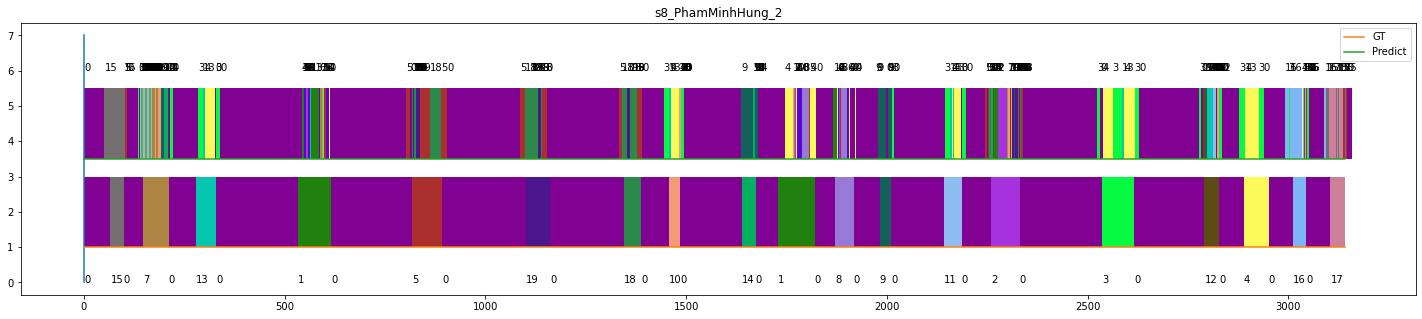

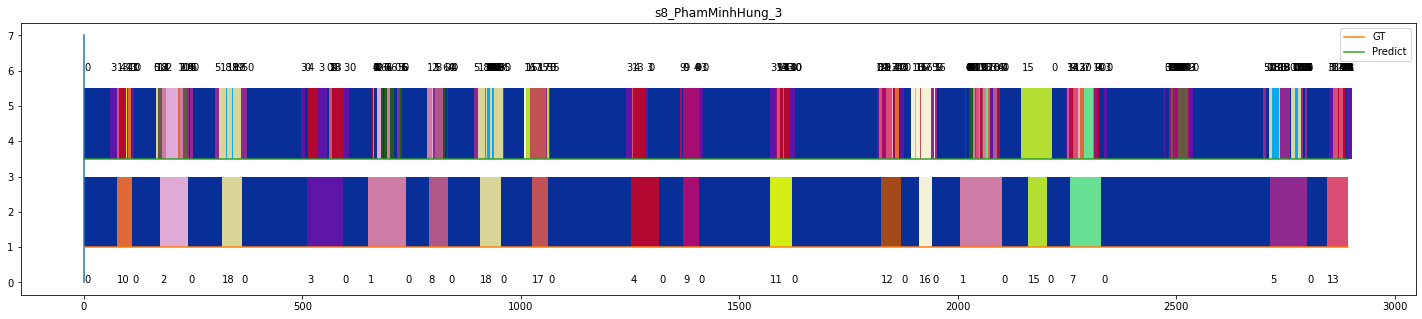

In [25]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
import random
import numpy as np
video_test_list = video_test_list
for video_name in (video_test_list):
    video_name = video_name[:-4]
    print(video_name)
    pred_foler = "/home/dev/DD-Net-Pytorch/csv_results/"
    gt_folder =  "/home/dev/DD-Net-Pytorch/gt_csv_results/"
    folder_saving = './comparing_60/'
    start_t, end_t, labels = get_timestamp(gt_folder+video_name+'.csv')
    pstart_t, pend_t, plabels = get_timestamp(pred_foler+video_name+'.csv')
    #labels =[i - 1 for i in labels]

    cmap = np.random.rand(20,3)

    fig, ax = plt.subplots(figsize=(25,5))
    #create simple line plot
    plt.plot([0, 0],[0,7])
    plt.plot([0, end_t[-1]],[1,1], label='GT')
    plt.plot([0, end_t[-1]],[3.5,3.5],  label='Predict')
    #add rectangle to plot

    for i, label in enumerate(labels):
        h = 2
        w = end_t[i] - start_t[i]
        xy = (start_t[i], 0+1)
        ax.add_patch(Rectangle(xy, w, h,
                 facecolor = cmap[labels[i]-1]))
    same_labels_list = []    
    for i, label in enumerate(labels):
        same_labels_list.append(i)
        if (i==len(labels)-1) or  (not label == labels[i+1]):

            middle = int(sum(same_labels_list)/len(same_labels_list))
            plt.text(start_t[middle], 0, str(label))
            same_labels_list = []    

    for i, label in enumerate(plabels):
        h = 2
        w = pend_t[i] - pstart_t[i]
        xy = (pstart_t[i], 0+3.5)
        ax.add_patch(Rectangle(xy, w, h,
                 facecolor = cmap[plabels[i]-1]))
    same_labels_list = []    
    for i, label in enumerate(plabels):
        same_labels_list.append(i)
        if (i==len(plabels)-1) or  (not label == plabels[i+1]):

            middle = int(sum(same_labels_list)/len(same_labels_list))
            plt.text(pstart_t[middle], 6, str(label))
            same_labels_list = []           
    ax.legend()
    plt.title(video_name)
    os.makedirs(folder_saving, exist_ok=True)  
    plt.savefig(folder_saving+video_name+'.png')
    plt.savefig(folder_saving+video_name+'.eps')

In [ ]:
!pip install nbconvert

Flatten label and measure the performance of segmentation model

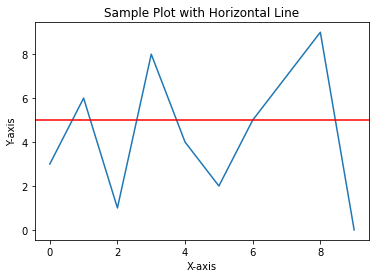

In [ ]:
import matplotlib.pyplot as plt

# Create a sample plot
x_values = range(10)
y_values = [3, 6, 1, 8, 4, 2, 5, 7, 9, 0]
plt.plot(x_values, y_values)

# Add a horizontal line
y = 5
plt.axhline(y=y, color='r')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Plot with Horizontal Line')

# Show the plot
plt.show()
